In [1]:
# -*- coding: utf-8 -*-
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import os, os.path
import operator
import reduce_emoji
import spelling_correction
import logistic_regression
import word_segmentation
import word_statistics
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#Initialize path of working folder
data_path = "../data/raw data"
train_path = os.path.join(data_path, "train_nor_811" + "." + "xlsx")
test_path = os.path.join(data_path, "test_nor_811" + "." + "xlsx")
valid_path = os.path.join(data_path, "valid_nor_811" + "." + "xlsx")

In [3]:
train_df = pd.read_excel(train_path, encoding="ISO-8859-1",usecols=[1,2])
valid_df = pd.read_excel(valid_path, encoding="ISO-8859-1",usecols=[1,2])
test_df = pd.read_excel(test_path, encoding="ISO-8859-1",usecols=[1,2])

Word Statistic of raw data

In [4]:
all_data = pd.concat([train_df, test_df, valid_df])
data_statistic = prep.Statistics(all_data)
data_statistic.head()
#all_data.to_excel(r"./output/statistics/Raw Data.xlsx")
#data_statistic.to_excel(r"./output/statistics/Raw Data Word Statistics.xlsx")

,Other,Disgust,Enjoyment,Anger,Surprise,Sadness,Fear
cho,119,176,140,118,4,101,23
mình,83,73,158,30,14,136,22
xin,15,8,17,8,0,15,3
bài,17,12,30,3,3,19,1
nhạc,10,8,9,1,0,2,1


Count Vectorizer + Linear Regression for raw data

In [4]:
raw_data = logistic_regression.Logistic_Regression(train_df.Sentence, train_df.Emotion, valid_df.Sentence, valid_df.Emotion, test_df.Sentence, test_df.Emotion)

WITH STOPWORD

RESULT FOR UNIGRAM CountVectorizer
Highest weighted f1-score on valid set: 56.07%
Highest weighted f1-score on test set with that model: 51.04%
Validation result for 2400 features
Accuracy score on valid set: 56.41%
Accuracy score on test set: 51.37%

RESULT FOR BIGRAM CountVectorizer
Highest weighted f1-score on valid set: 54.41%
Highest weighted f1-score on test set with that model: 51.23%
Validation result for 4600 features
Accuracy score on valid set: 54.96%
Accuracy score on test set: 51.52%

RESULT FOR TRIGRAM CountVectorizer
Highest weighted f1-score on valid set: 54.26%
Highest weighted f1-score on test set with that model: 51.05%
Validation result for 4600 features
Accuracy score on valid set: 54.96%
Accuracy score on test set: 51.37%


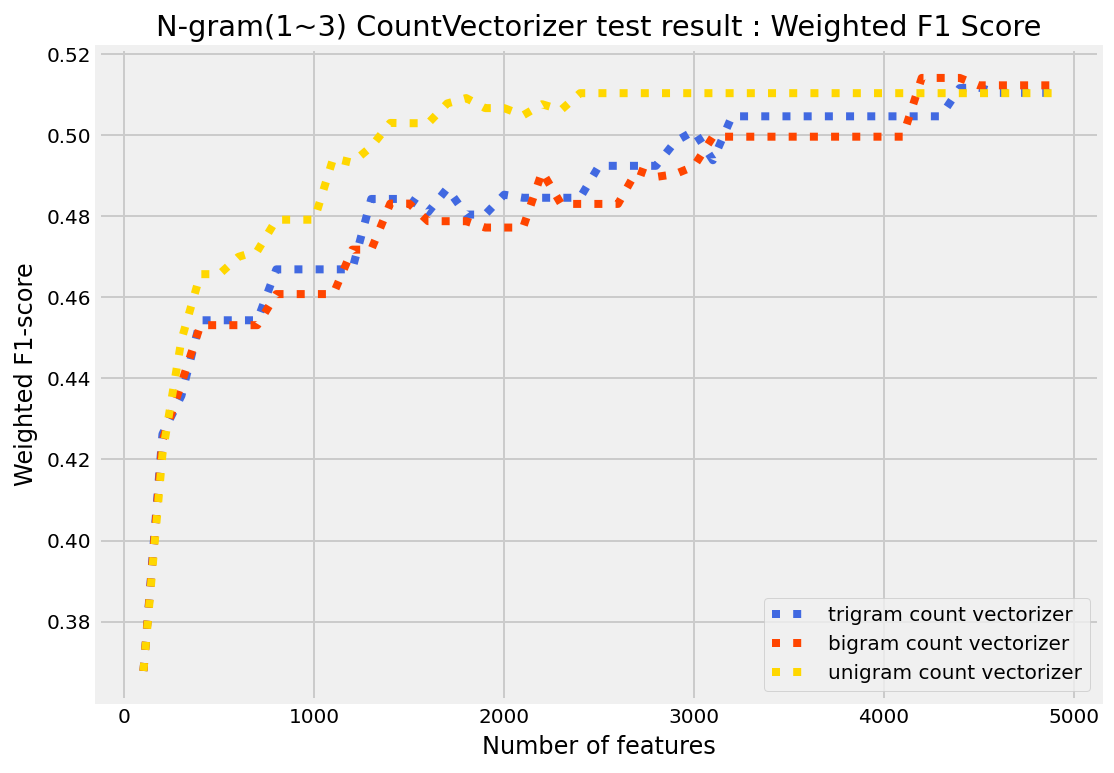

In [5]:
raw_data.UseCountVectorizer()

RESULT FOR UNIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 54.08%
Max accuracy score on test set: 51.80%
Validation result for 1800 features
f1_score: 51.47%

RESULT FOR BIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 53.64%
Max accuracy score on test set: 51.80%
Validation result for 4500 features
f1_score: 51.09%

RESULT FOR TRIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 54.08%
Max accuracy score on test set: 52.38%
Validation result for 4900 features
f1_score: 51.68%


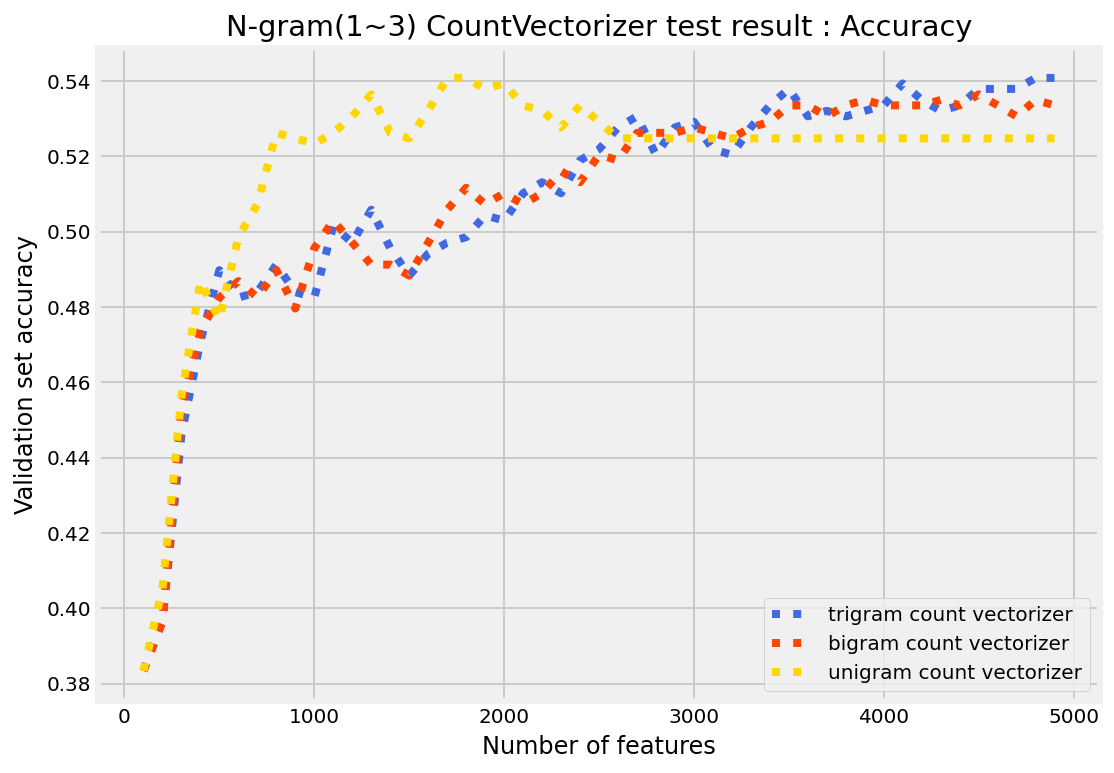

In [6]:
raw_data.UseCountVectorizer() #max df=300, min_df = 2

TFIDF Vectorizer + Linear Regression for raw data

WITH STOPWORD
RESULT FOR UNIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 53.20%
Highest weighted f1-score on test set with that model: 51.89%
Validation result for 2600 features
Accuracy score on valid set: 54.96%
Accuracy score on test set: 53.25%

RESULT FOR BIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 53.57%
Highest weighted f1-score on test set with that model: 50.34%
Validation result for 4300 features
Accuracy score on valid set: 55.83%
Accuracy score on test set: 51.95%

RESULT FOR TRIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 53.10%
Highest weighted f1-score on test set with that model: 50.75%
Validation result for 3400 features
Accuracy score on valid set: 55.25%
Accuracy score on test set: 52.38%


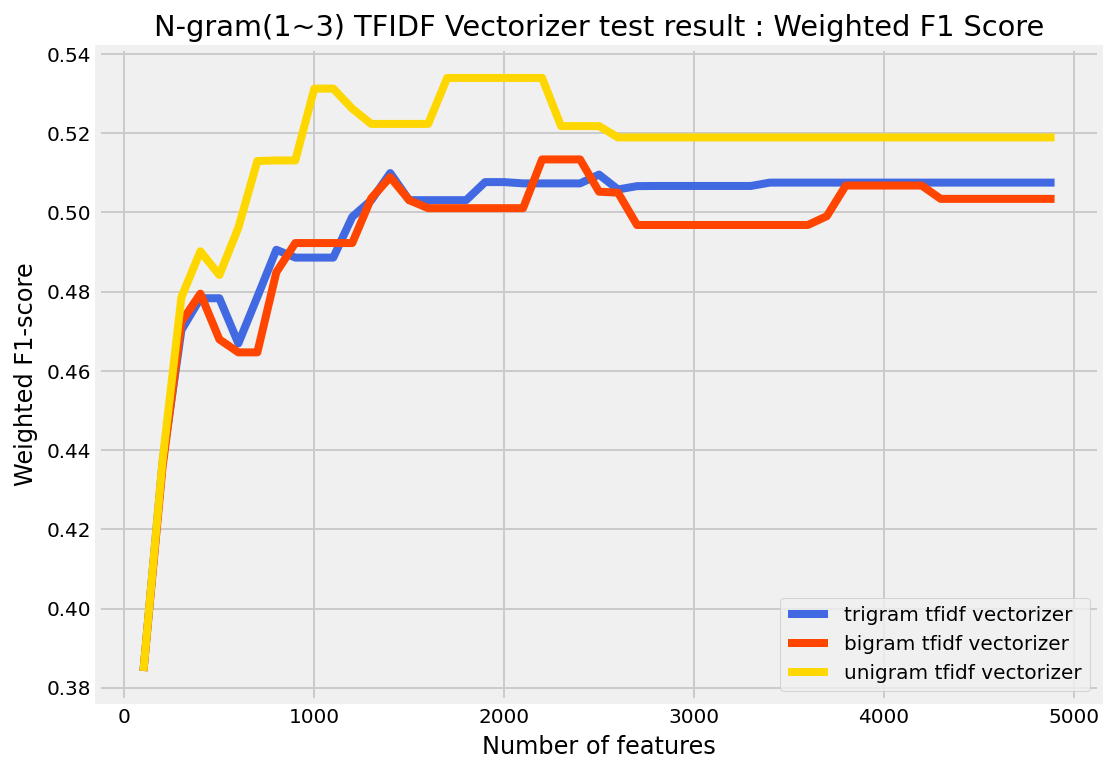

In [6]:
raw_data.UseTFIDFVectorizer()

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 51.17%
Max accuracy score on test set: 52.67%
Validation result for 2600 features
f1_score: 51.50%
Validation result for 2700 features
f1_score: 51.50%
Validation result for 2800 features
f1_score: 51.50%
Validation result for 2900 features
f1_score: 51.50%
Validation result for 3000 features
f1_score: 51.50%
Validation result for 3100 features
f1_score: 51.50%
Validation result for 3200 features
f1_score: 51.50%
Validation result for 3300 features
f1_score: 51.50%
Validation result for 3400 features
f1_score: 51.50%
Validation result for 3500 features
f1_score: 51.50%
Validation result for 3600 features
f1_score: 51.50%
Validation result for 3700 features
f1_score: 51.50%
Validation result for 3800 features
f1_score: 51.50%
Validation result for 3900 features
f1_score: 51.50%
Validation result for 4000 features
f1_score: 51.50%
Validation result for 4100 features
f1_score: 51.50%
Validation result for 4200 fea

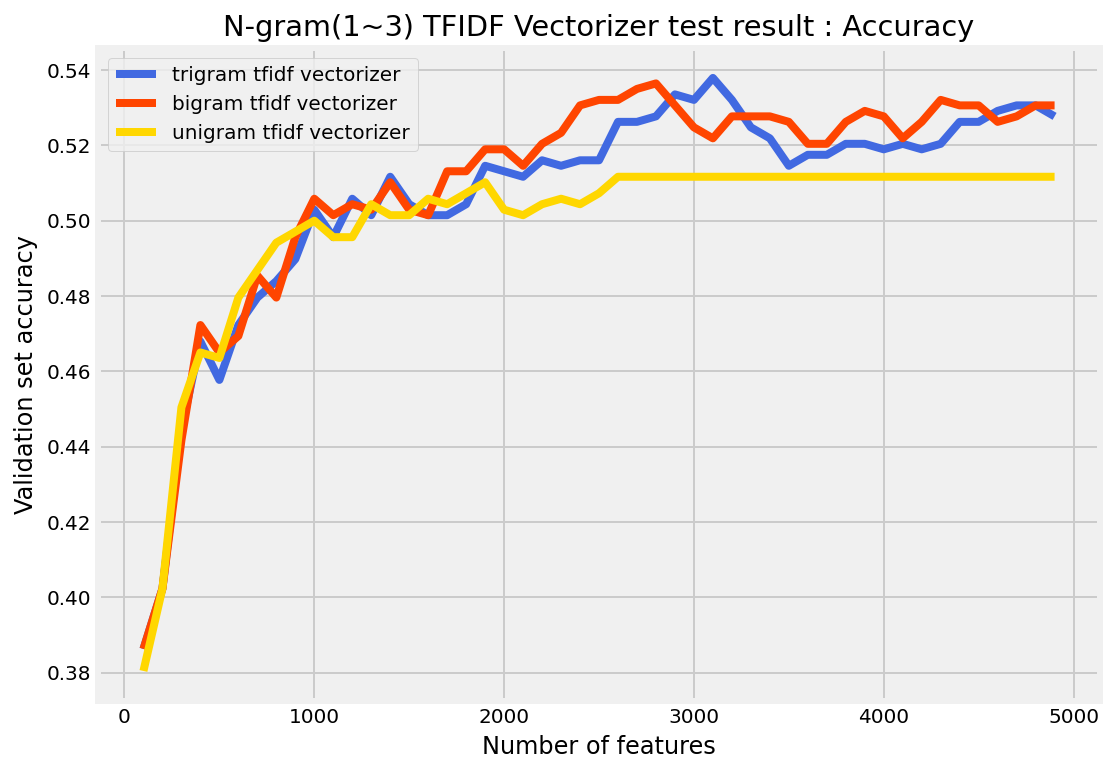

In [6]:
raw_data.UseTFIDFVectorizer() #min_df=2, max_df = 300

In [6]:
from sklearn.metrics import accuracy_score
print(raw_data.max_acc)
y_pred = raw_data.model.predict(test_df.Sentence)
accuracy = accuracy_score(test_df.Emotion, y_pred)
print(accuracy)

0.5451895043731778
0.5165945165945166


In [4]:
train_reduced = reduce_emoji.ReduceEmoji(train_df)
valid_reduced = reduce_emoji.ReduceEmoji(valid_df)
test_reduced = reduce_emoji.ReduceEmoji(test_df)

Word Statistic of reduced emoji data

In [5]:
all_reduced_data = pd.concat([train_reduced,valid_reduced,test_reduced])
reduced_data_statistic = prep.Statistics(all_reduced_data)
#reduced_data_statistic.head()
reduced_data_statistic.to_excel(r"./output/statistics/Reduced Emoji Data Statistic.xlsx")

TFIDF+Linear Regression for reduced emoji data

In [6]:
reduced_data = logistic_regression.Logistic_Regression(train_reduced.Sentence, train_reduced.Emotion, valid_reduced.Sentence, valid_reduced.Emotion, test_reduced.Sentence, test_reduced.Emotion)

Count Vectorizer + Linear Regression for reduced emoji data

WITH STOPWORD

RESULT FOR UNIGRAM CountVectorizer
Highest weighted f1-score on valid set: 56.95%
Highest weighted f1-score on test set with that model: 55.24%
Validation result for 3400 features
Accuracy score on valid set: 57.29%
Accuracy score on test set: 55.70%

RESULT FOR BIGRAM CountVectorizer
Highest weighted f1-score on valid set: 58.37%
Highest weighted f1-score on test set with that model: 55.58%
Validation result for 6000 features
Accuracy score on valid set: 58.75%
Accuracy score on test set: 56.13%

RESULT FOR TRIGRAM CountVectorizer
Highest weighted f1-score on valid set: 58.52%
Highest weighted f1-score on test set with that model: 55.87%
Validation result for 4300 features
Accuracy score on valid set: 59.04%
Accuracy score on test set: 56.42%


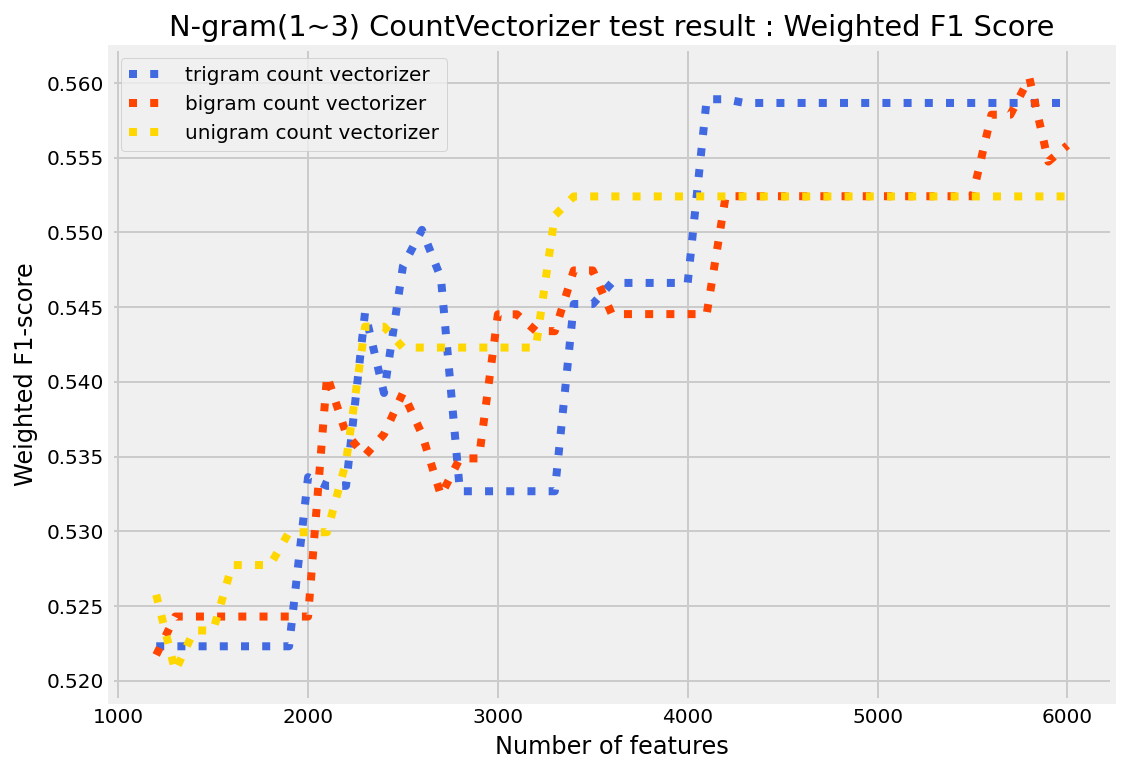

In [7]:
reduced_data.UseCountVectorizer()

RESULT FOR UNIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 53.94%
Max accuracy score on test set: 55.70%
Validation result for 2400 features
f1_score: 55.10%

RESULT FOR BIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 57.58%
Max accuracy score on test set: 53.39%
Validation result for 3700 features
f1_score: 52.93%

RESULT FOR TRIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 56.71%
Max accuracy score on test set: 55.27%
Validation result for 4600 features
f1_score: 54.83%
Validation result for 4700 features
f1_score: 54.79%


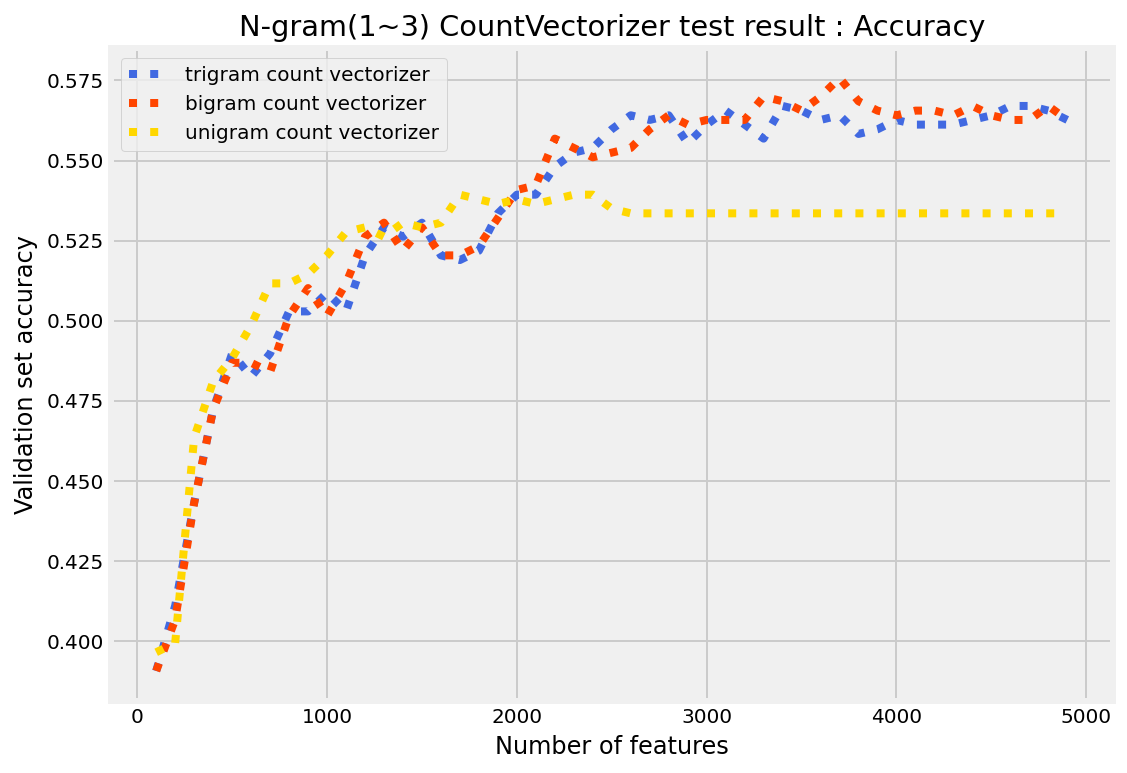

In [9]:
reduced_data.UseCountVectorizer() #min_df = 2, max_df = 300

TFIDF Vectorizer + Linear Regression for reduced emoji data

WITH STOPWORD
RESULT FOR UNIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 56.01%
Highest weighted f1-score on test set with that model: 55.99%
Validation result for 3000 features
Accuracy score on valid set: 57.58%
Accuracy score on test set: 57.43%

RESULT FOR BIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 56.18%
Highest weighted f1-score on test set with that model: 54.97%
Validation result for 2300 features
Accuracy score on valid set: 58.16%
Accuracy score on test set: 56.71%

RESULT FOR TRIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 56.11%
Highest weighted f1-score on test set with that model: 54.10%
Validation result for 3300 features
Accuracy score on valid set: 58.16%
Accuracy score on test set: 55.84%


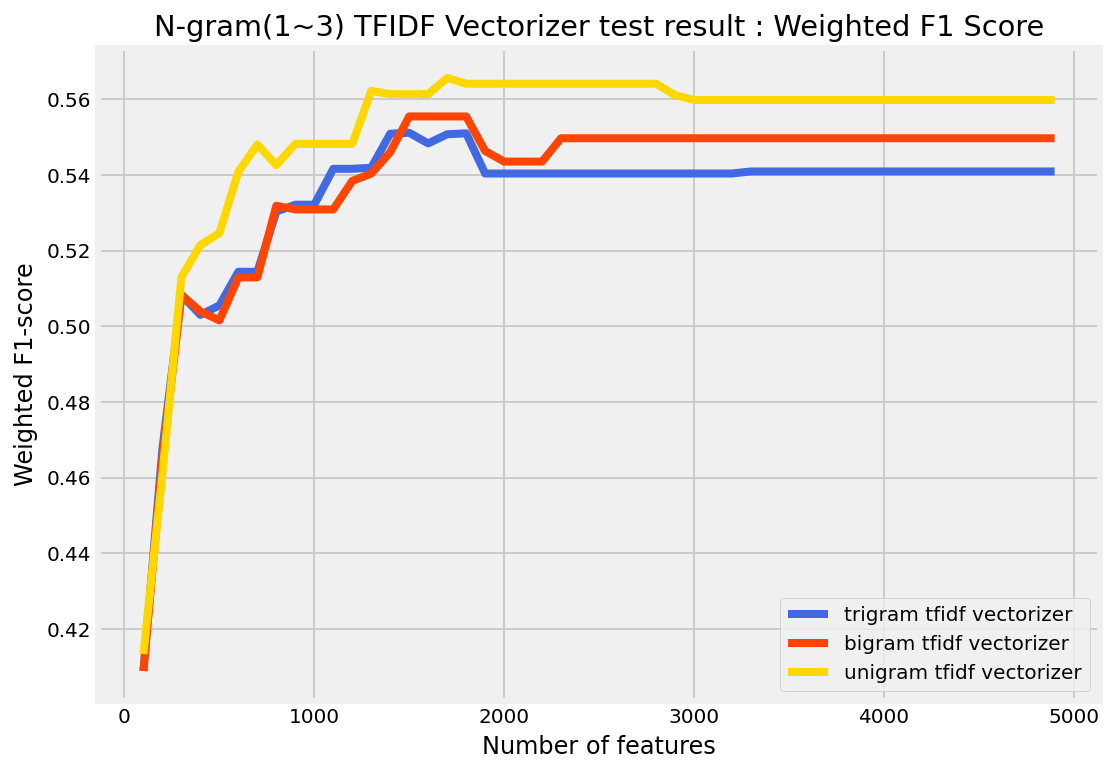

In [8]:
reduced_data.UseTFIDFVectorizer()

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 54.23%
Max accuracy score on test set: 56.13%
Validation result for 2400 features
f1_score: 54.99%

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 56.12%
Max accuracy score on test set: 56.28%
Validation result for 4900 features
f1_score: 54.49%

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 55.69%
Max accuracy score on test set: 55.70%
Validation result for 4700 features
f1_score: 53.93%
Validation result for 4900 features
f1_score: 53.90%


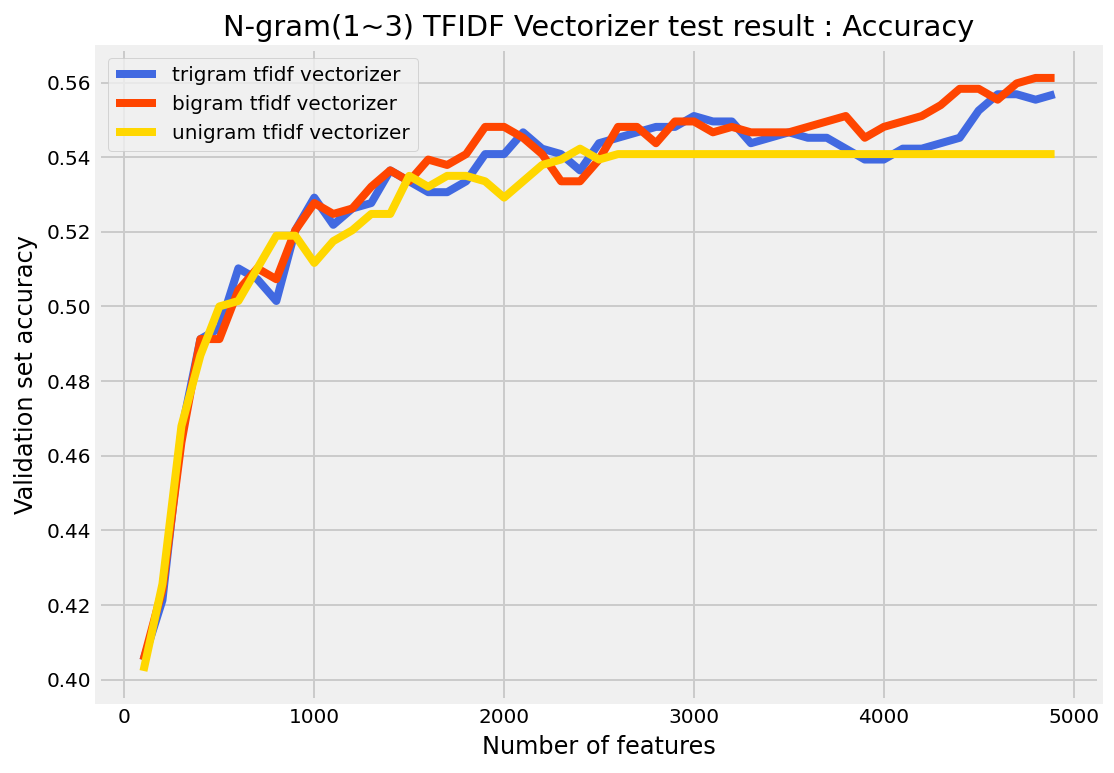

In [10]:
reduced_data.UseTFIDFVectorizer() #min_df = 2, max_df = 300

In [8]:
from sklearn.metrics import accuracy_score
print(reduced_data.max_acc)
y_pred = reduced_data.model.predict(test_reduced.Sentence)
accuracy = accuracy_score(test_reduced.Emotion, y_pred)
print(accuracy)

0.5903790087463557
0.5642135642135642


In [9]:
train_spelling = spelling_correction.SpellingCorrection(train_reduced)
valid_spelling = spelling_correction.SpellingCorrection(valid_reduced)
test_spelling = spelling_correction.SpellingCorrection(test_reduced)

Word Statistic of spelling corrected data

In [6]:
all_spelling_data = pd.concat([train_spelling,valid_spelling,test_spelling])
spelling_data_statistic = prep.Statistics(all_spelling_data)
#spelling_data_statistic.head()
spelling_data_statistic.to_excel(r"./output/statistics/Spelling corrected Data Statistic.xlsx")

In [7]:
all_spelling_data.to_excel(r"./output/statistics/Spelling corrected.xlsx")

In [10]:
spelling_data = logistic_regression.Logistic_Regression(train_spelling.Sentence, train_spelling.Emotion, valid_spelling.Sentence, valid_spelling.Emotion, test_spelling.Sentence, test_spelling.Emotion)

Count Vectorizer + Linear Regression for spelling corrected data

WITH STOPWORD

RESULT FOR UNIGRAM CountVectorizer
Highest weighted f1-score on valid set: 55.85%
Highest weighted f1-score on test set with that model: 54.53%
Validation result for 1300 features
Accuracy score on valid set: 56.27%
Accuracy score on test set: 55.27%

RESULT FOR BIGRAM CountVectorizer
Highest weighted f1-score on valid set: 58.52%
Highest weighted f1-score on test set with that model: 55.67%
Validation result for 5600 features
Accuracy score on valid set: 58.89%
Accuracy score on test set: 56.42%

RESULT FOR TRIGRAM CountVectorizer
Highest weighted f1-score on valid set: 58.42%
Highest weighted f1-score on test set with that model: 55.90%
Validation result for 4500 features
Accuracy score on valid set: 58.89%
Accuracy score on test set: 56.71%


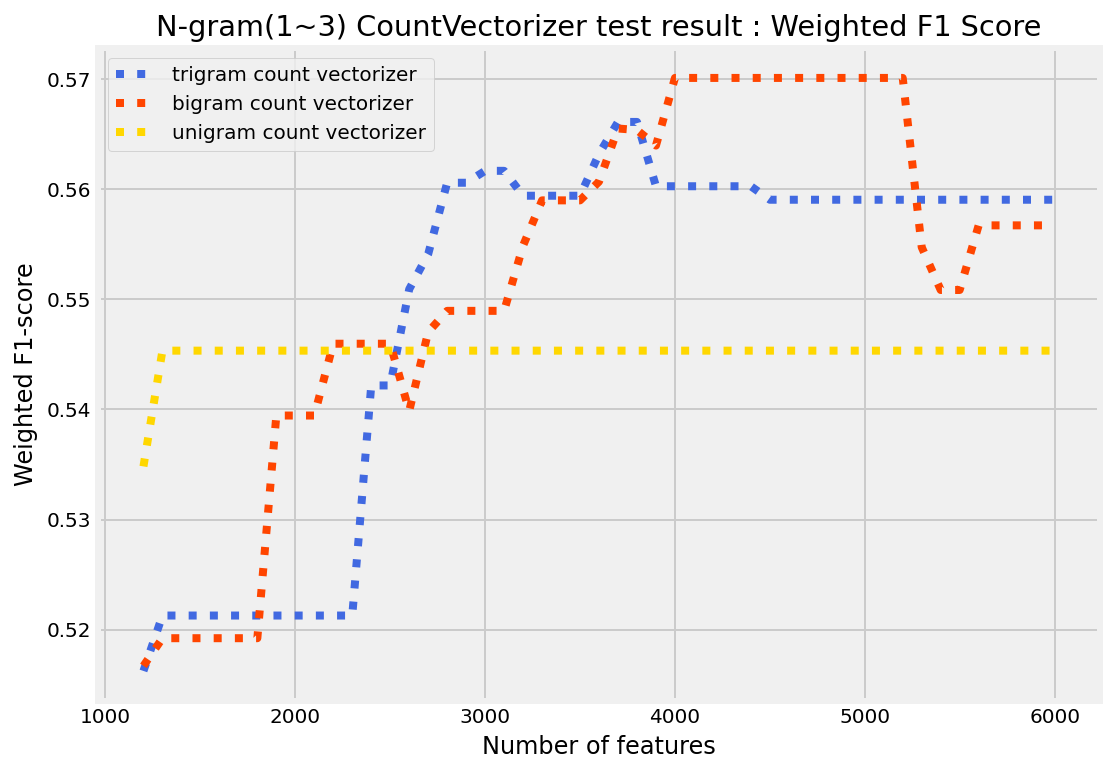

In [11]:
spelling_data.UseCountVectorizer()

WITH STOPWORD

RESULT FOR UNIGRAM CountVectorizer
Highest weighted f1-score on valid set: 55.80%
Highest weighted f1-score on test set with that model: 53.96%
Validation result for 1300 features
Accuracy score on valid set: 56.27%
Accuracy score on test set: 54.69%

RESULT FOR BIGRAM CountVectorizer
Highest weighted f1-score on valid set: 58.58%
Highest weighted f1-score on test set with that model: 55.95%
Validation result for 4900 features
Accuracy score on valid set: 59.04%
Accuracy score on test set: 56.71%

RESULT FOR TRIGRAM CountVectorizer
Highest weighted f1-score on valid set: 58.64%
Highest weighted f1-score on test set with that model: 55.77%
Validation result for 5200 features
Accuracy score on valid set: 59.04%
Accuracy score on test set: 56.57%


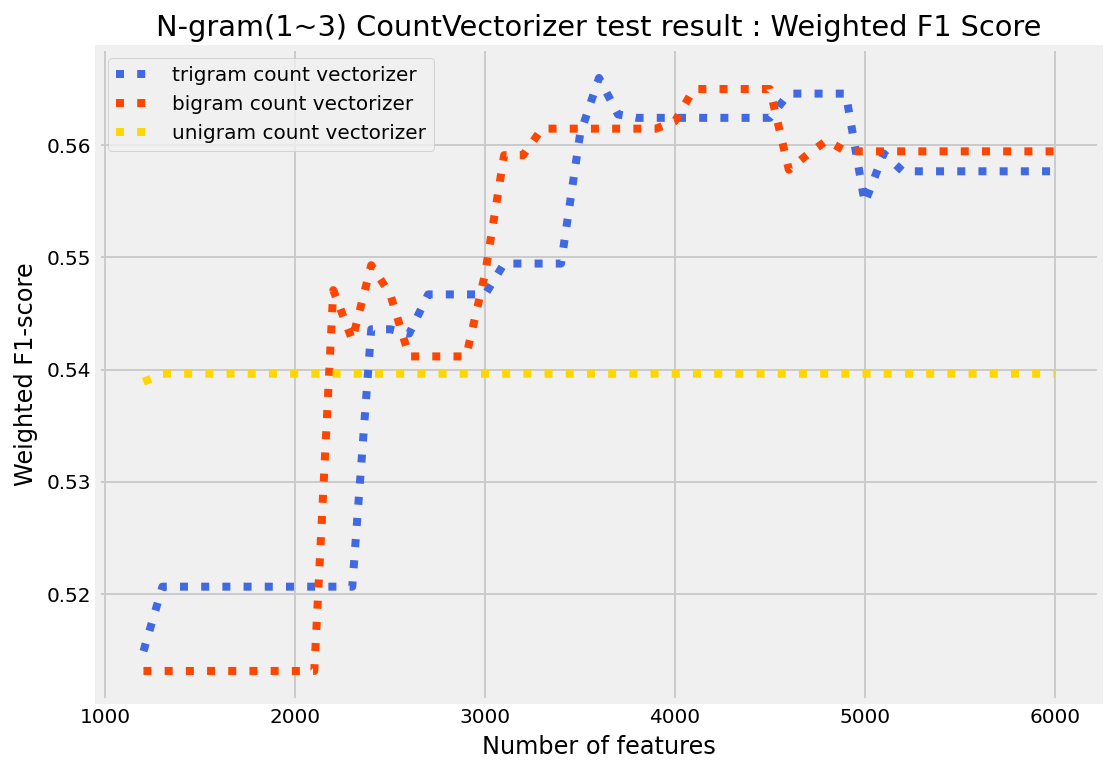

In [12]:
spelling_data.UseCountVectorizer(min_df = 2) #min_df = 2

WITHOUT STOPWORD

RESULT FOR UNIGRAM CountVectorizer
Highest weighted f1-score on valid set: 55.55%
Highest weighted f1-score on test set with that model: 56.80%
Validation result for 3300 features
Accuracy score on valid set: 55.98%
Accuracy score on test set: 57.29%

RESULT FOR BIGRAM CountVectorizer
Highest weighted f1-score on valid set: 56.97%
Highest weighted f1-score on test set with that model: 56.00%
Validation result for 5600 features
Accuracy score on valid set: 57.29%
Accuracy score on test set: 56.85%

RESULT FOR TRIGRAM CountVectorizer
Highest weighted f1-score on valid set: 56.61%
Highest weighted f1-score on test set with that model: 55.88%
Validation result for 4600 features
Accuracy score on valid set: 57.00%
Accuracy score on test set: 56.71%


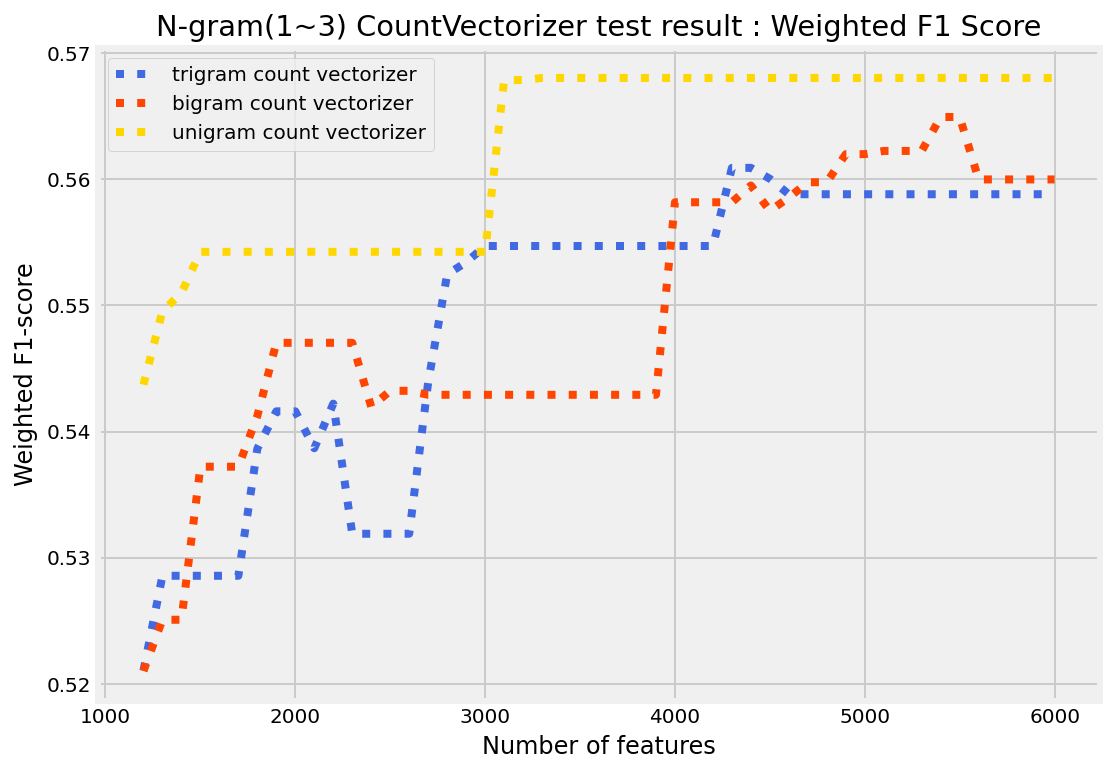

In [13]:
spelling_data.UseCountVectorizer(use_stop_words=False) #remove stopwords

WITHOUT STOPWORD

RESULT FOR UNIGRAM CountVectorizer
Highest weighted f1-score on valid set: 55.34%
Highest weighted f1-score on test set with that model: 57.20%
Validation result for 2100 features
Accuracy score on valid set: 55.69%
Accuracy score on test set: 57.86%

RESULT FOR BIGRAM CountVectorizer
Highest weighted f1-score on valid set: 56.86%
Highest weighted f1-score on test set with that model: 55.37%
Validation result for 5800 features
Accuracy score on valid set: 57.14%
Accuracy score on test set: 56.13%

RESULT FOR TRIGRAM CountVectorizer
Highest weighted f1-score on valid set: 56.64%
Highest weighted f1-score on test set with that model: 55.98%
Validation result for 5400 features
Accuracy score on valid set: 57.00%
Accuracy score on test set: 56.85%


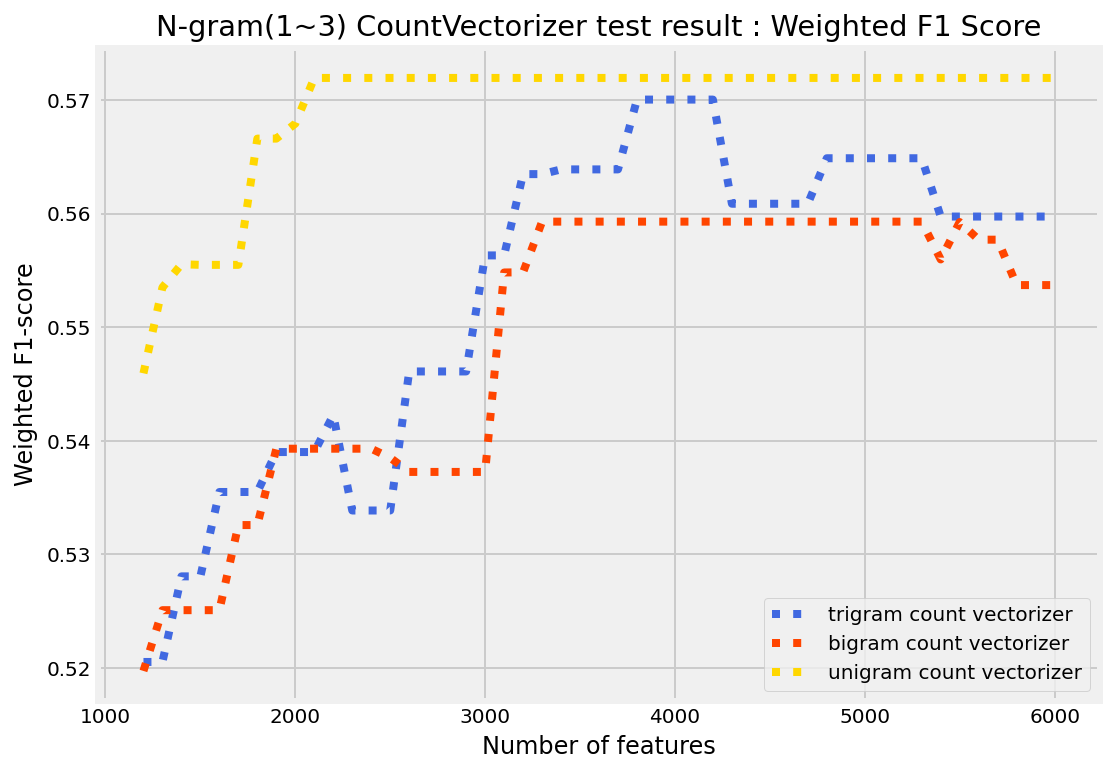

In [14]:
spelling_data.UseCountVectorizer(min_df = 2, use_stop_words=False) #min_df = 2, remove stopwords

TFIDF Vectorizer + Linear Regression for spelling corrected data

WITH STOPWORD
RESULT FOR UNIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 56.27%
Highest weighted f1-score on test set with that model: 57.48%
Validation result for 1800 features
Accuracy score on valid set: 57.87%
Accuracy score on test set: 58.73%

RESULT FOR BIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 56.84%
Highest weighted f1-score on test set with that model: 57.23%
Validation result for 4300 features
Accuracy score on valid set: 58.75%
Accuracy score on test set: 58.87%

RESULT FOR TRIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 57.03%
Highest weighted f1-score on test set with that model: 56.46%
Validation result for 3900 features
Accuracy score on valid set: 59.04%
Accuracy score on test set: 58.15%


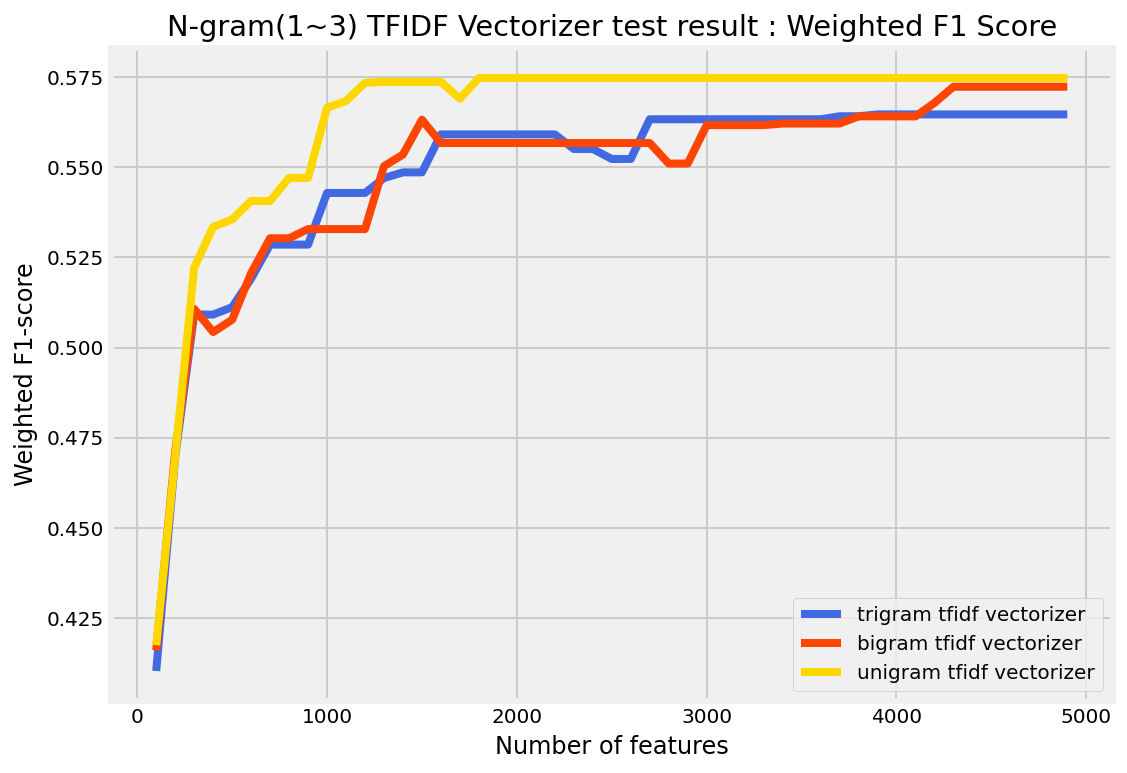

In [15]:
spelling_data.UseTFIDFVectorizer()

WITH STOPWORD
RESULT FOR UNIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 56.02%
Highest weighted f1-score on test set with that model: 57.44%
Validation result for 1200 features
Accuracy score on valid set: 57.58%
Accuracy score on test set: 58.87%

RESULT FOR BIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 56.68%
Highest weighted f1-score on test set with that model: 57.10%
Validation result for 4300 features
Accuracy score on valid set: 58.60%
Accuracy score on test set: 58.73%

RESULT FOR TRIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 57.14%
Highest weighted f1-score on test set with that model: 57.33%
Validation result for 4500 features
Accuracy score on valid set: 59.04%
Accuracy score on test set: 58.87%


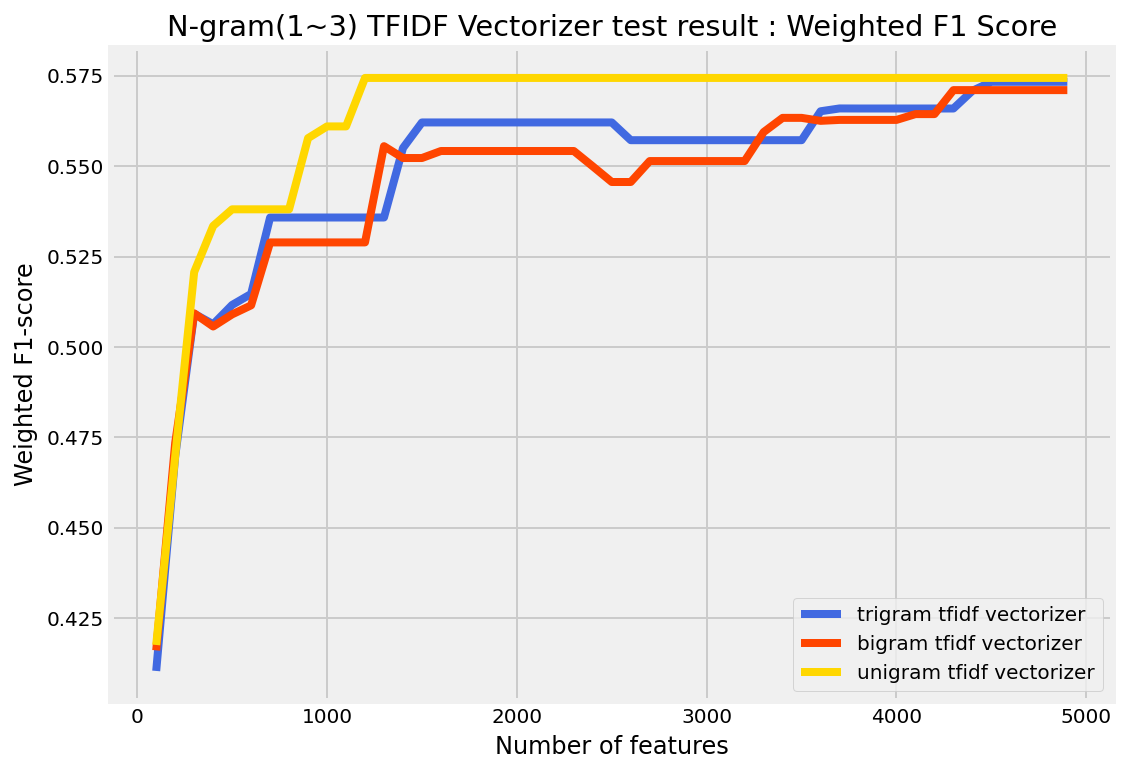

In [16]:
spelling_data.UseTFIDFVectorizer(min_df = 2) #min_df = 2

WITHOUT STOPWORD
RESULT FOR UNIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 55.38%
Highest weighted f1-score on test set with that model: 56.65%
Validation result for 1300 features
Accuracy score on valid set: 56.85%
Accuracy score on test set: 57.86%

RESULT FOR BIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 55.48%
Highest weighted f1-score on test set with that model: 56.34%
Validation result for 4100 features
Accuracy score on valid set: 57.43%
Accuracy score on test set: 57.86%

RESULT FOR TRIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 55.69%
Highest weighted f1-score on test set with that model: 57.03%
Validation result for 4900 features
Accuracy score on valid set: 57.73%
Accuracy score on test set: 58.59%


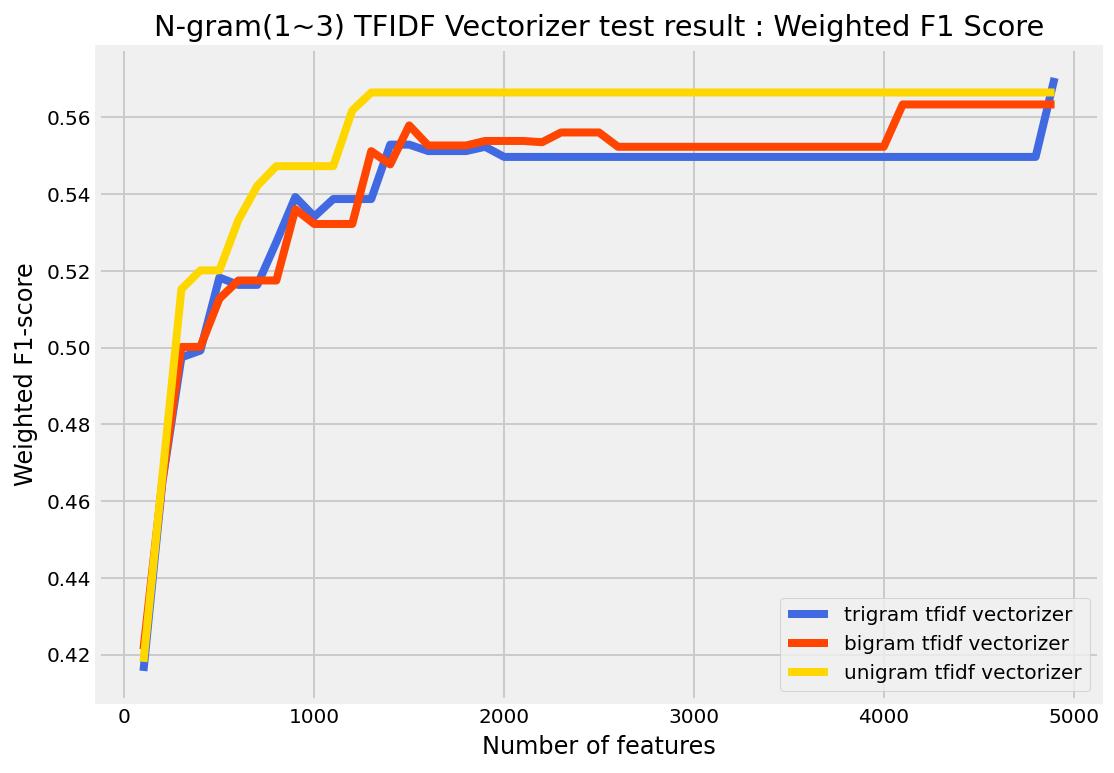

In [17]:
spelling_data.UseTFIDFVectorizer(use_stop_words=False) #remove stopwords

WITHOUT STOPWORD
RESULT FOR UNIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 55.21%
Highest weighted f1-score on test set with that model: 56.89%
Validation result for 1300 features
Accuracy score on valid set: 56.71%
Accuracy score on test set: 58.01%

RESULT FOR BIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 55.45%
Highest weighted f1-score on test set with that model: 56.34%
Validation result for 3900 features
Accuracy score on valid set: 57.29%
Accuracy score on test set: 57.86%

RESULT FOR TRIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 55.68%
Highest weighted f1-score on test set with that model: 55.33%
Validation result for 2600 features
Accuracy score on valid set: 57.29%
Accuracy score on test set: 57.00%


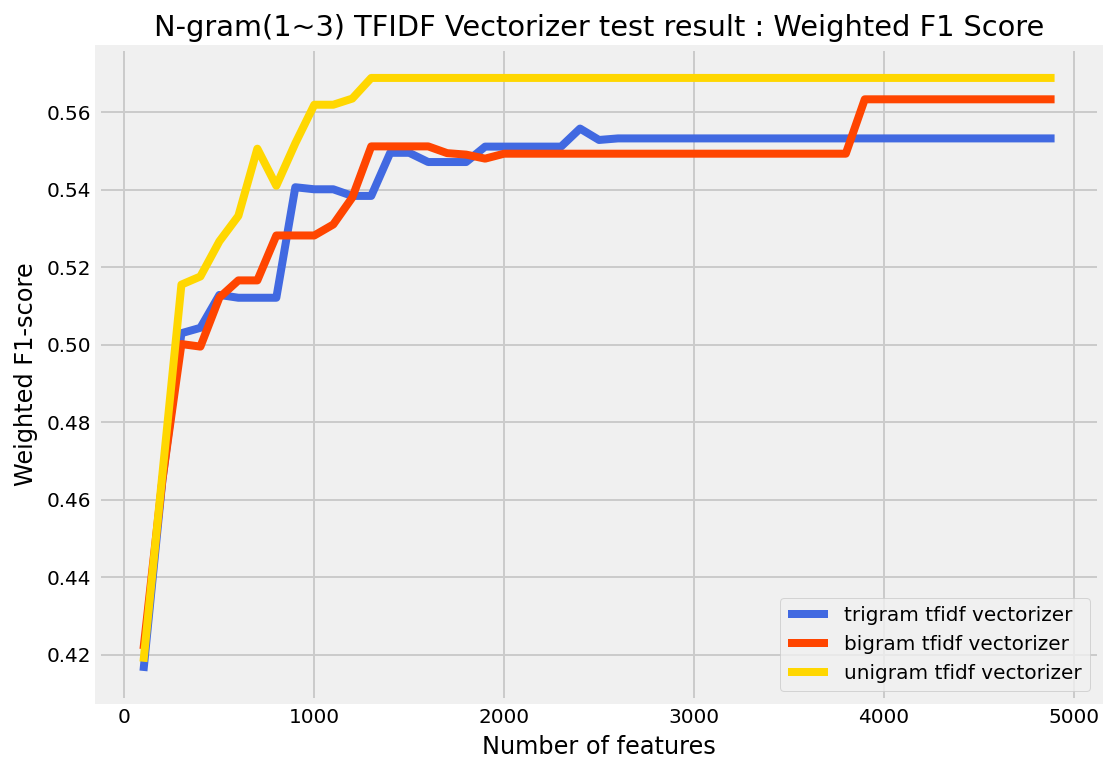

In [18]:
spelling_data.UseTFIDFVectorizer(min_df = 2, use_stop_words=False) #min_df = 2, remove stopwords

# Keep repeated emoji

In [19]:
train_reduced = reduce_emoji.ReduceEmoji(train_df, keep_repeated_emoji = True)
valid_reduced = reduce_emoji.ReduceEmoji(valid_df, keep_repeated_emoji = True)
test_reduced = reduce_emoji.ReduceEmoji(test_df, keep_repeated_emoji = True)

In [20]:
train_spelling = spelling_correction.SpellingCorrection(train_reduced)
valid_spelling = spelling_correction.SpellingCorrection(valid_reduced)
test_spelling = spelling_correction.SpellingCorrection(test_reduced)

In [21]:
spelling_data = logistic_regression.Logistic_Regression(train_spelling.Sentence, train_spelling.Emotion, valid_spelling.Sentence, valid_spelling.Emotion, test_spelling.Sentence, test_spelling.Emotion)

Count Vectorizer + Linear Regression for spelling corrected data

WITH STOPWORD

RESULT FOR UNIGRAM CountVectorizer
Highest weighted f1-score on valid set: 55.65%
Highest weighted f1-score on test set with that model: 57.96%
Validation result for 3700 features
Accuracy score on valid set: 55.98%
Accuracy score on test set: 58.59%

RESULT FOR BIGRAM CountVectorizer
Highest weighted f1-score on valid set: 58.95%
Highest weighted f1-score on test set with that model: 56.92%
Validation result for 6000 features
Accuracy score on valid set: 59.33%
Accuracy score on test set: 57.72%

RESULT FOR TRIGRAM CountVectorizer
Highest weighted f1-score on valid set: 58.01%
Highest weighted f1-score on test set with that model: 56.99%
Validation result for 4400 features
Accuracy score on valid set: 58.45%
Accuracy score on test set: 57.58%


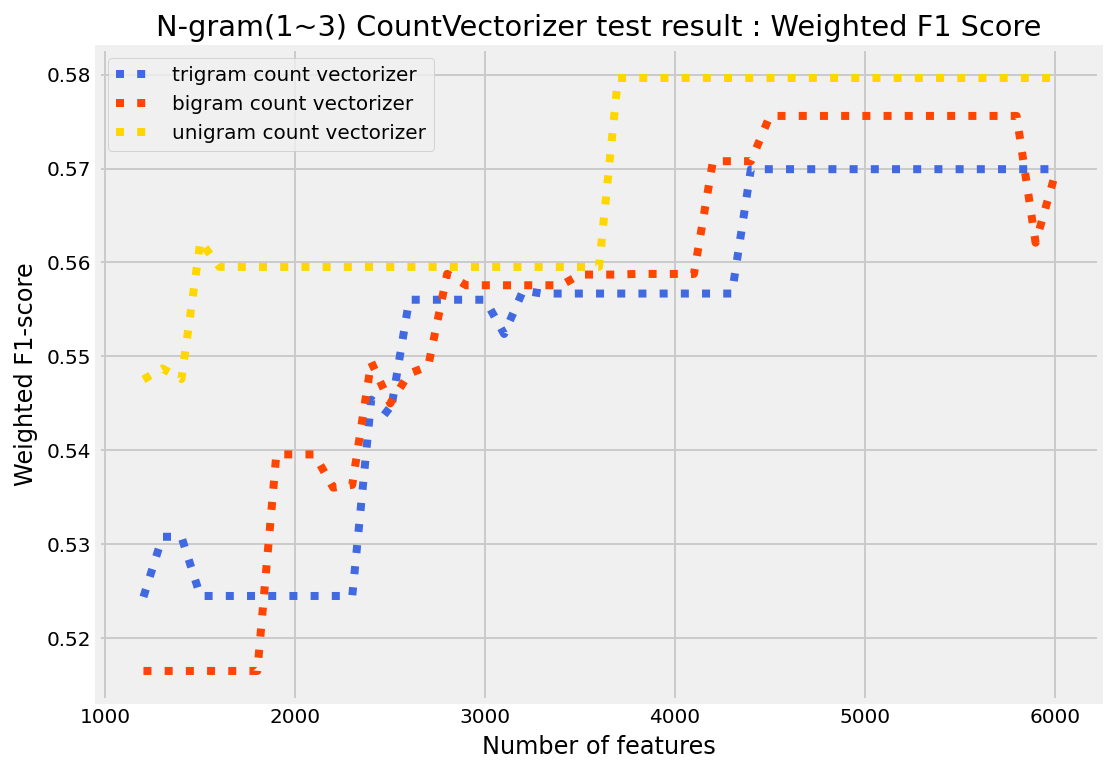

In [22]:
spelling_data.UseCountVectorizer()

WITH STOPWORD

RESULT FOR UNIGRAM CountVectorizer
Highest weighted f1-score on valid set: 55.62%
Highest weighted f1-score on test set with that model: 55.27%
Validation result for 1600 features
Accuracy score on valid set: 55.98%
Accuracy score on test set: 55.99%

RESULT FOR BIGRAM CountVectorizer
Highest weighted f1-score on valid set: 58.35%
Highest weighted f1-score on test set with that model: 56.79%
Validation result for 5900 features
Accuracy score on valid set: 58.75%
Accuracy score on test set: 57.58%

RESULT FOR TRIGRAM CountVectorizer
Highest weighted f1-score on valid set: 58.34%
Highest weighted f1-score on test set with that model: 56.68%
Validation result for 5900 features
Accuracy score on valid set: 58.75%
Accuracy score on test set: 57.29%


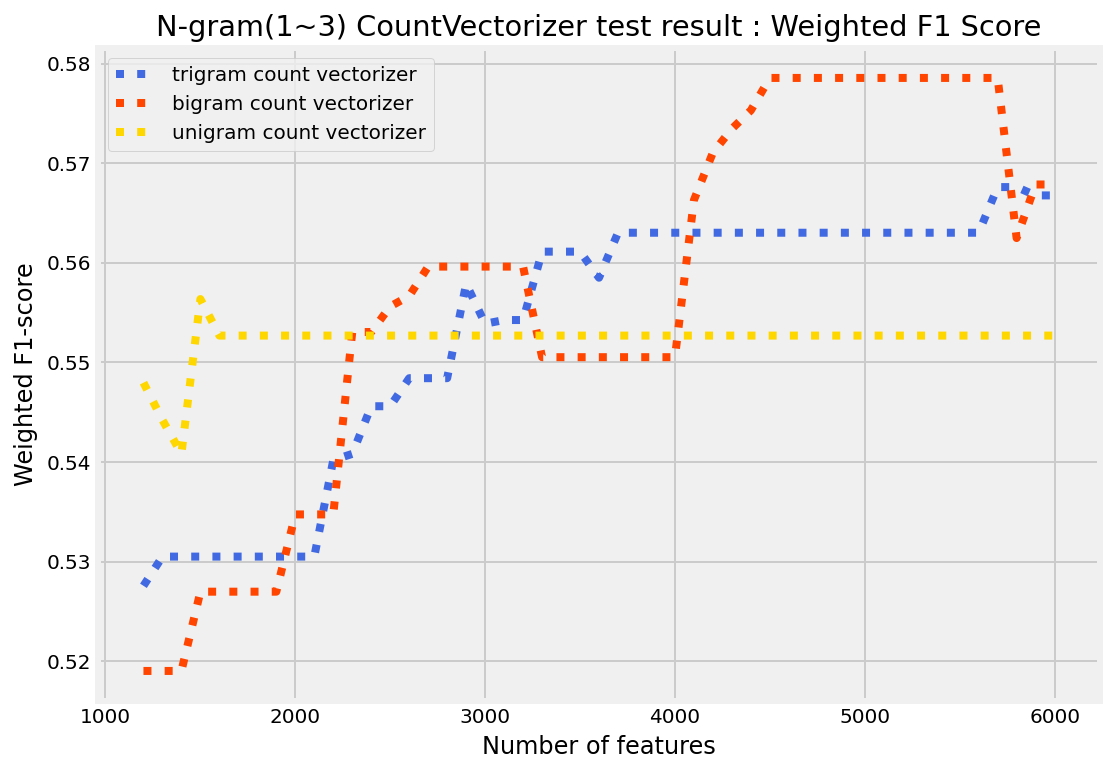

In [23]:
spelling_data.UseCountVectorizer(min_df = 2) #min_df = 2

WITHOUT STOPWORD

RESULT FOR UNIGRAM CountVectorizer
Highest weighted f1-score on valid set: 55.19%
Highest weighted f1-score on test set with that model: 55.31%
Validation result for 1600 features
Accuracy score on valid set: 55.54%
Accuracy score on test set: 55.99%

RESULT FOR BIGRAM CountVectorizer
Highest weighted f1-score on valid set: 56.72%
Highest weighted f1-score on test set with that model: 55.59%
Validation result for 5700 features
Accuracy score on valid set: 57.00%
Accuracy score on test set: 56.42%

RESULT FOR TRIGRAM CountVectorizer
Highest weighted f1-score on valid set: 56.80%
Highest weighted f1-score on test set with that model: 55.49%
Validation result for 6000 features
Accuracy score on valid set: 57.14%
Accuracy score on test set: 56.42%


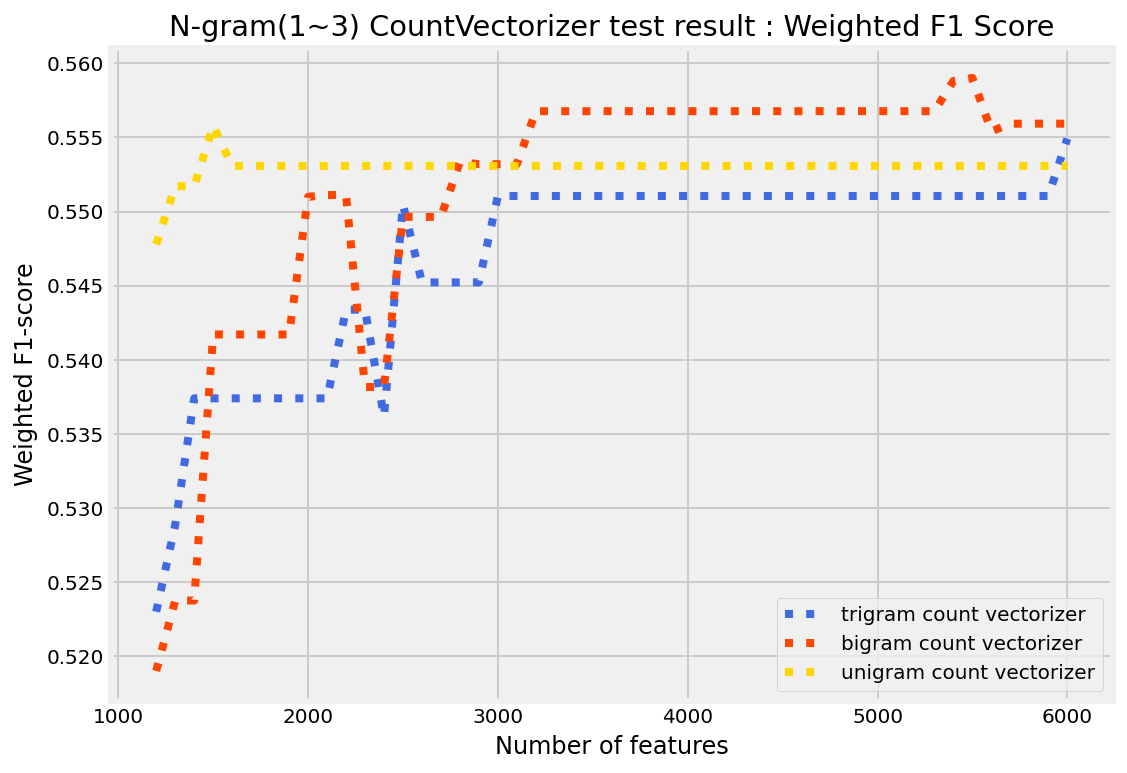

In [24]:
spelling_data.UseCountVectorizer(use_stop_words=False) #remove stopwords

WITHOUT STOPWORD

RESULT FOR UNIGRAM CountVectorizer
Highest weighted f1-score on valid set: 55.55%
Highest weighted f1-score on test set with that model: 55.02%
Validation result for 1300 features
Accuracy score on valid set: 55.98%
Accuracy score on test set: 55.84%

RESULT FOR BIGRAM CountVectorizer
Highest weighted f1-score on valid set: 56.38%
Highest weighted f1-score on test set with that model: 54.87%
Validation result for 5800 features
Accuracy score on valid set: 56.71%
Accuracy score on test set: 55.70%

RESULT FOR TRIGRAM CountVectorizer
Highest weighted f1-score on valid set: 57.44%
Highest weighted f1-score on test set with that model: 55.58%
Validation result for 6000 features
Accuracy score on valid set: 57.87%
Accuracy score on test set: 56.42%


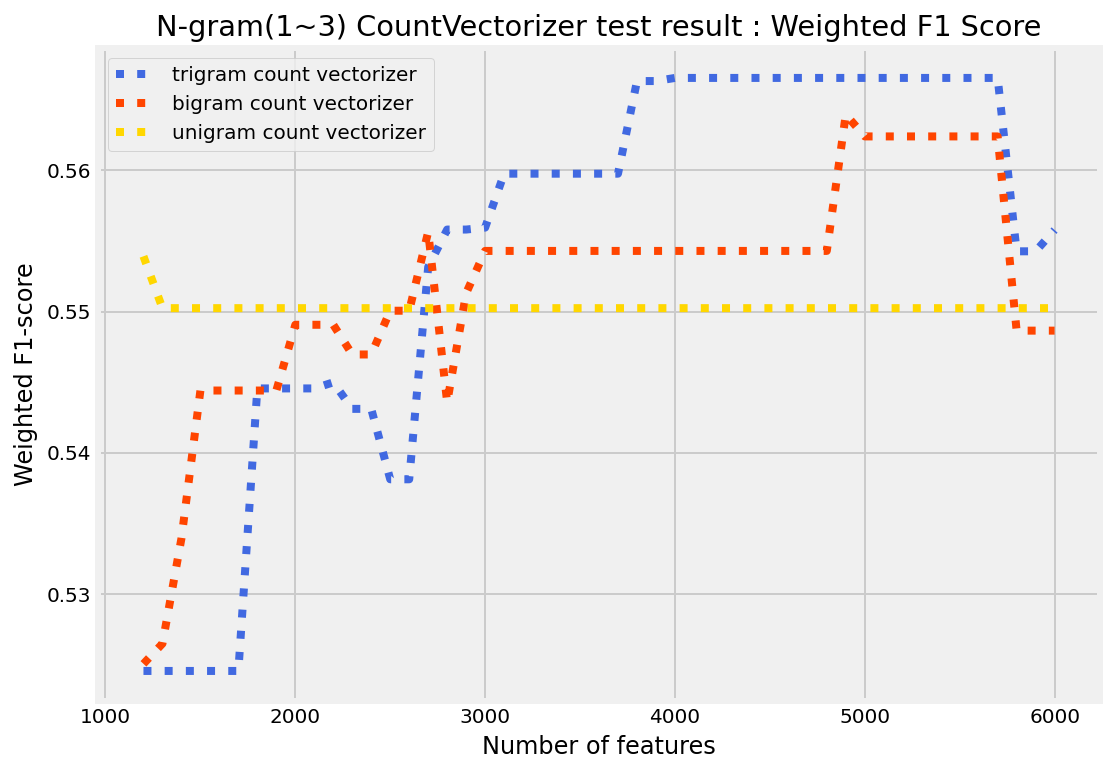

In [25]:
spelling_data.UseCountVectorizer(min_df = 2, use_stop_words=False) #min_df = 2, remove stopwords

TFIDF Vectorizer + Linear Regression for spelling corrected data

WITH STOPWORD
RESULT FOR UNIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 55.67%
Highest weighted f1-score on test set with that model: 57.31%
Validation result for 2900 features
Accuracy score on valid set: 57.29%
Accuracy score on test set: 58.73%

RESULT FOR BIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 57.48%
Highest weighted f1-score on test set with that model: 57.11%
Validation result for 4100 features
Accuracy score on valid set: 59.48%
Accuracy score on test set: 59.02%

RESULT FOR TRIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 57.11%
Highest weighted f1-score on test set with that model: 56.86%
Validation result for 3700 features
Accuracy score on valid set: 59.18%
Accuracy score on test set: 58.87%


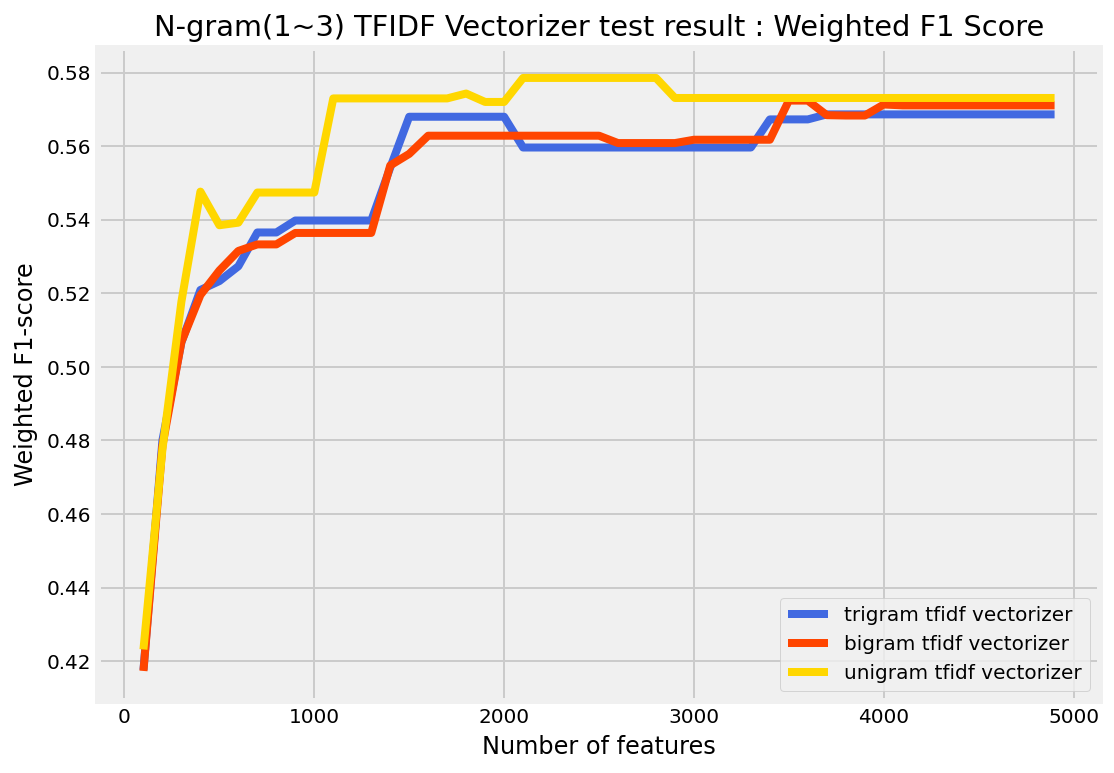

In [26]:
spelling_data.UseTFIDFVectorizer()

WITH STOPWORD
RESULT FOR UNIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 55.84%
Highest weighted f1-score on test set with that model: 57.35%
Validation result for 1900 features
Accuracy score on valid set: 57.43%
Accuracy score on test set: 58.73%

RESULT FOR BIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 57.44%
Highest weighted f1-score on test set with that model: 57.66%
Validation result for 4100 features
Accuracy score on valid set: 59.48%
Accuracy score on test set: 59.60%

RESULT FOR TRIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 57.54%
Highest weighted f1-score on test set with that model: 57.43%
Validation result for 4200 features
Accuracy score on valid set: 59.48%
Accuracy score on test set: 59.45%


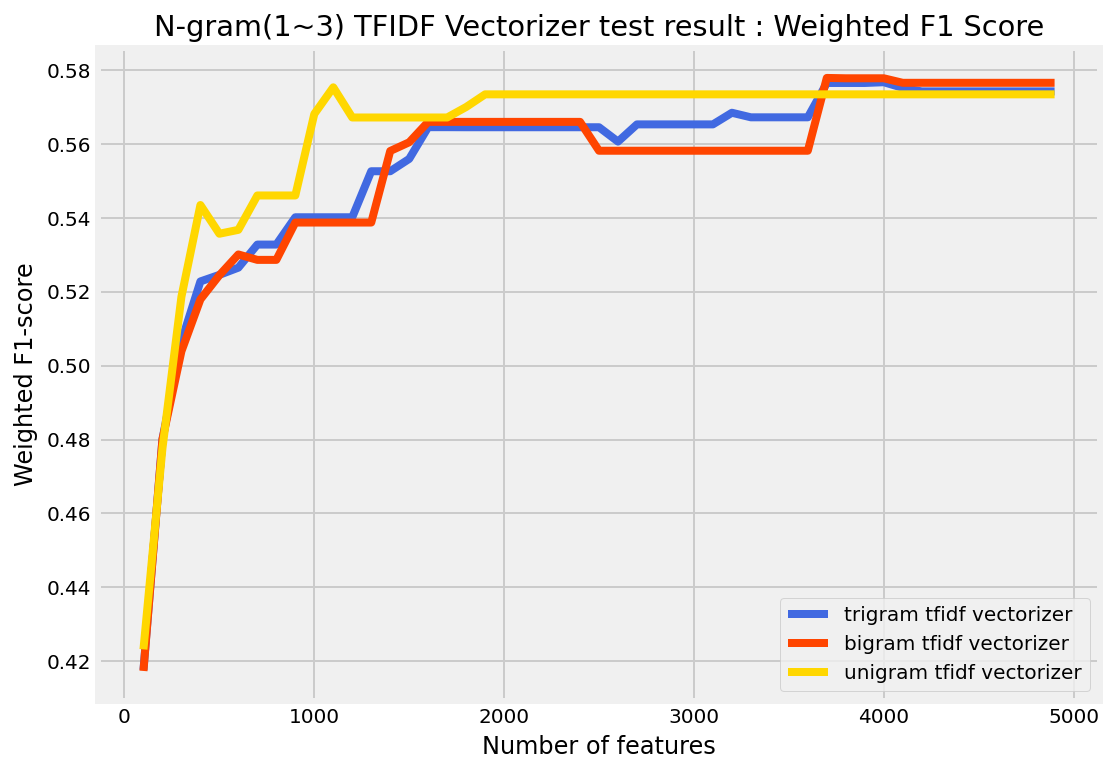

In [27]:
spelling_data.UseTFIDFVectorizer(min_df = 2) #min_df = 2

WITHOUT STOPWORD
RESULT FOR UNIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 55.80%
Highest weighted f1-score on test set with that model: 57.15%
Validation result for 3600 features
Accuracy score on valid set: 57.43%
Accuracy score on test set: 58.59%

RESULT FOR BIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 56.02%
Highest weighted f1-score on test set with that model: 56.03%
Validation result for 2600 features
Accuracy score on valid set: 57.73%
Accuracy score on test set: 58.01%

RESULT FOR TRIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 55.88%
Highest weighted f1-score on test set with that model: 56.58%
Validation result for 2700 features
Accuracy score on valid set: 57.58%
Accuracy score on test set: 58.44%


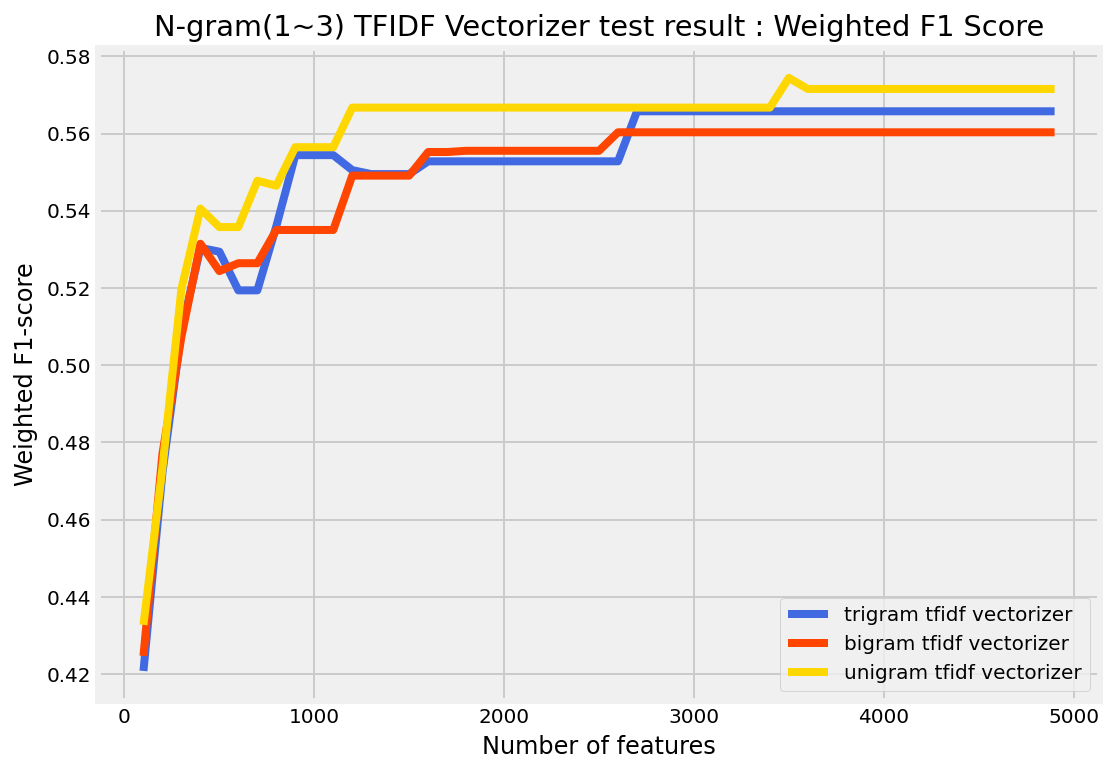

In [28]:
spelling_data.UseTFIDFVectorizer(use_stop_words=False) #remove stopwords

WITHOUT STOPWORD
RESULT FOR UNIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 55.88%
Highest weighted f1-score on test set with that model: 57.14%
Validation result for 1200 features
Accuracy score on valid set: 57.43%
Accuracy score on test set: 58.44%

RESULT FOR BIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 55.89%
Highest weighted f1-score on test set with that model: 57.32%
Validation result for 4900 features
Accuracy score on valid set: 57.87%
Accuracy score on test set: 59.16%

RESULT FOR TRIGRAM TfidfVectorizer
Highest weighted f1-score on valid set: 56.39%
Highest weighted f1-score on test set with that model: 56.18%
Validation result for 2800 features
Accuracy score on valid set: 58.31%
Accuracy score on test set: 58.15%


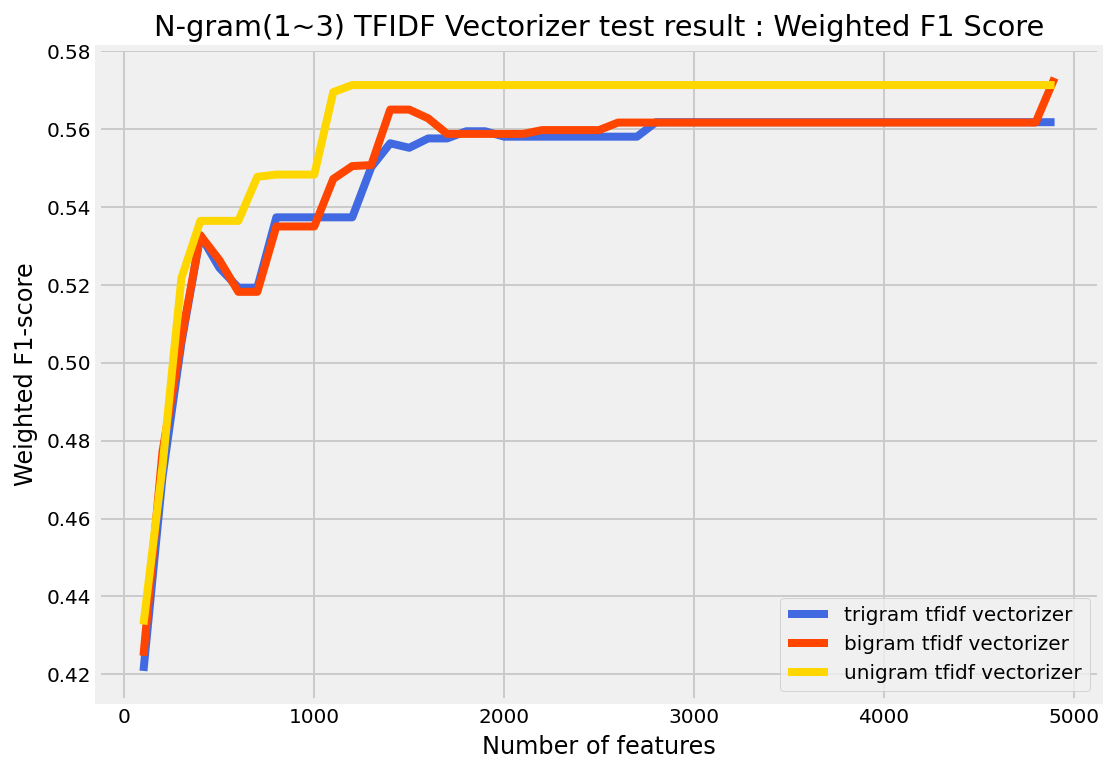

In [29]:
spelling_data.UseTFIDFVectorizer(min_df = 2, use_stop_words=False) #min_df = 2, remove stopwords

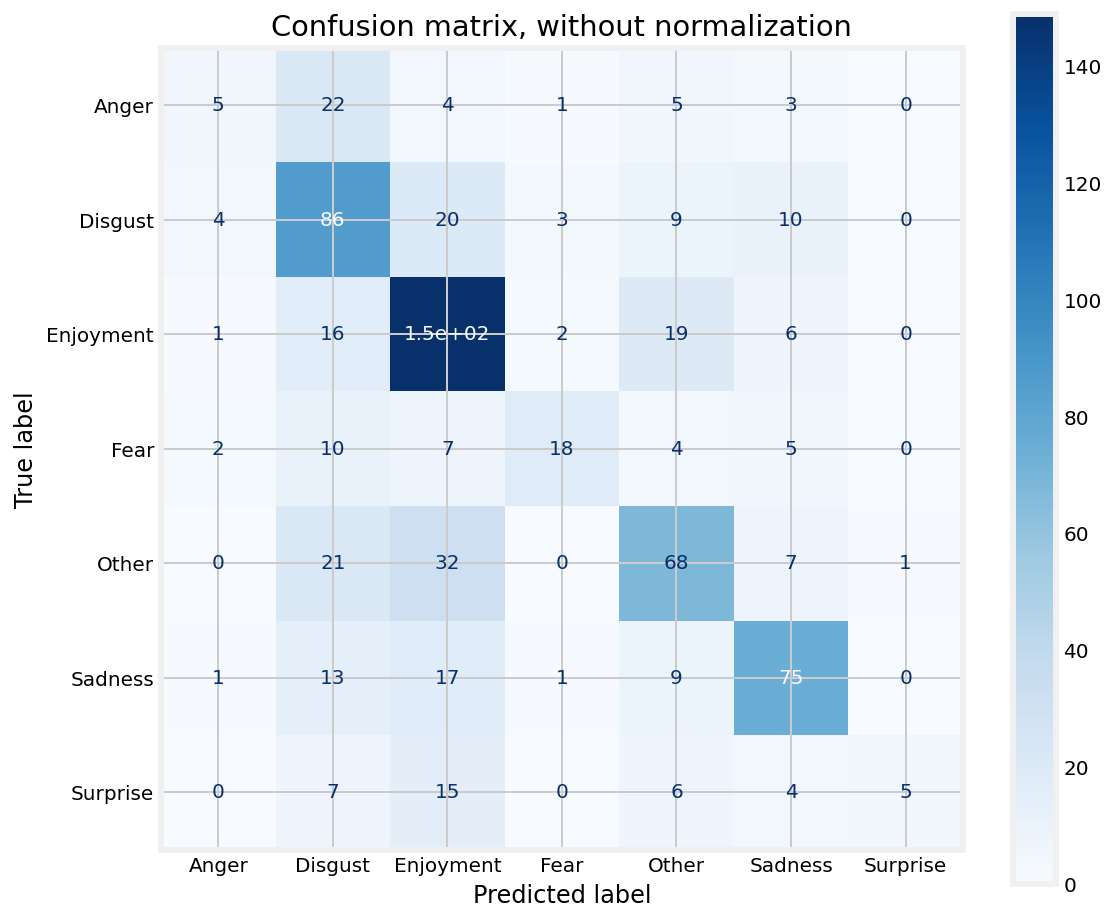

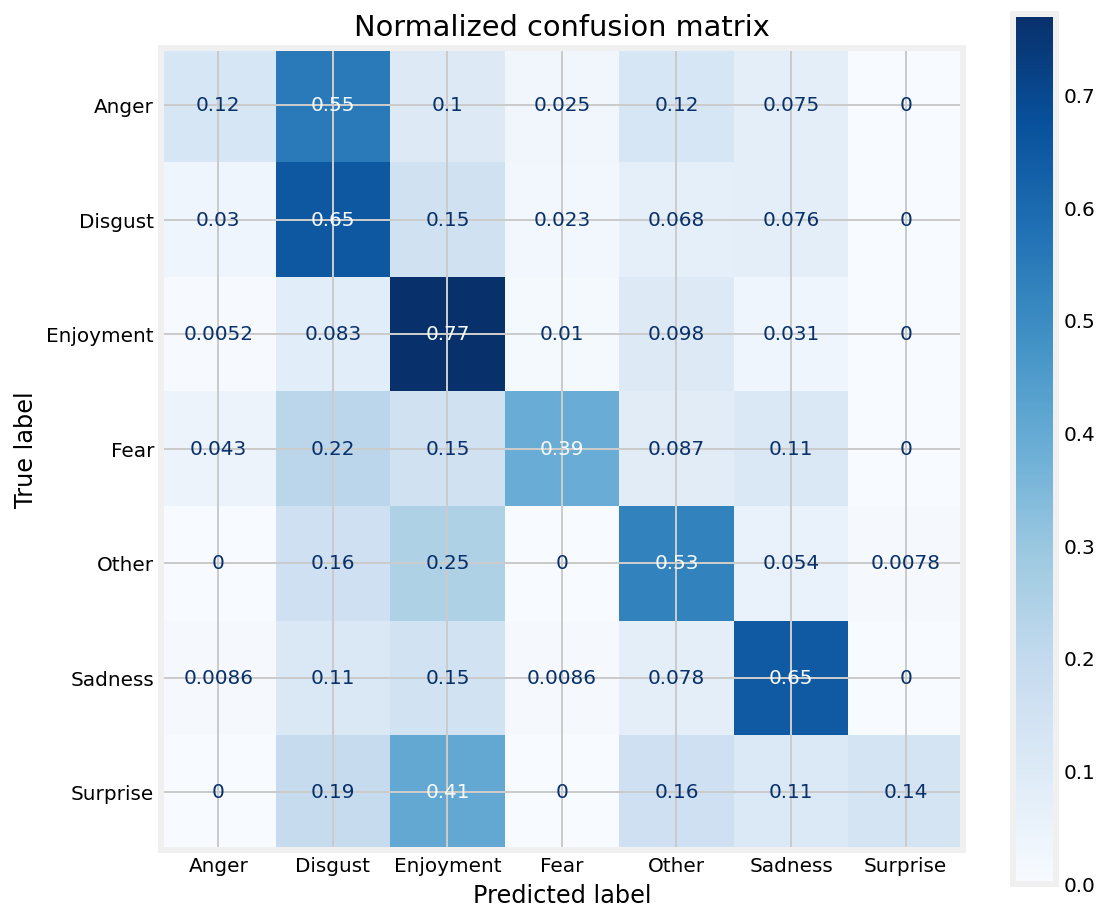

In [30]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams['figure.figsize'] = [8, 8]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(spelling_data.model[0], test_spelling.Sentence, test_spelling.Emotion,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)
    #disp.figure.savefig('filename.png')


In [31]:
def CreateWordDict(df):
    '''Count the number of time a word appears in all the sentence'''
    
    word_dict = {'word':{'Fear':0,'Enjoyment':0,'Other':0,'Disgust':0,'Anger':0,'Sadness':0,'Surprise':0}}
    
    for sentence, emotion in zip(df['Sentence'],df['Emotion']):
        word_list = sentence.split(' ')
        for word in word_list:
            if word in word_dict.keys():
                word_dict[word][emotion] += 1
            else:
                word_dict[word] = dict(word_dict['word'])
                word_dict[word][emotion] +=1
    del word_dict['word']
    #for word in word_dict.keys():
        
     #   maxVal = max(word_dict[word].values())
        
        #P(sadness|word):P(enjoyment|word):...
      #  word_dict[word] = {k: round(v/maxVal,3) for k, v in word_dict[word].items()}
    return word_dict

In [32]:
def CountFeature(word_dict):
    count_feature = {}
    total_feature = 0
    for key, val in word_dict.items():
        for emo, count in val.items():
            if emo in count_feature.keys():
                count_feature[emo] += count
            else:
                count_feature[emo] = count
        total_feature +=1
    return count_feature, total_feature

In [33]:
def ProbabilityOfWord(word_dict):
    
    count_feature, total_feature = CountFeature(word_dict)
    prob_dict = {}
    for word, emo_count in word_dict.items():
        word_prob = {} #{'word':{'Fear':0.02, 'Enjoyment':0.03},...}
        for emo, count in emo_count.items():
            prob = (count + 1) / (count_feature[emo] + total_feature) 
            word_prob[emo] = prob
        prob_dict[word] = word_prob
    return prob_dict

In [34]:
def ProbabilityOfEmotion(df):
    
    emo_prob = {}
    for emo in df.Emotion.unique():
        count = len(df[df.Emotion==emo])
        prob = count/len(df)
        emo_prob[emo] = prob
    return emo_prob

In [35]:
def ProbabilityOfSentence(train_df, test_df):
    
    sentence_prob = {}
    word_dict = CreateWordDict(train_df)
    emo_prob_dict = ProbabilityOfEmotion(train_df)
    prob_dict = ProbabilityOfWord(word_dict)
    count_feature, total_feature = CountFeature(word_dict)
    sentence_predict = []
    for sentence in test_df.Sentence:
        word_list = sentence.split(' ')
        for emo, emo_prob in emo_prob_dict.items():
            probability = emo_prob
            for word in word_list:
                if word not in prob_dict.keys():
                    word_prob = 1 / (count_feature[emo] + total_feature)
                else:
                    word_prob = prob_dict[word][emo]
                probability *= word_prob
            sentence_prob[emo]=probability
        for k,v in sentence_prob.items():
            if v == max(sentence_prob.values()):  
                sentence_predict.append(k)

    answer_df = test_df.copy()
    answer_df['Predict Label'] = sentence_predict
    return answer_df

In [36]:
answer_df = ProbabilityOfSentence(train_spelling, test_spelling)
answer_df.to_excel('./output.xlsx')

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 57.73%
Max accuracy score on test set: 58.15%
Validation result for 2500 features
f1_score: 56.66%

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 59.62%
Max accuracy score on test set: 58.30%
Validation result for 9300 features
f1_score: 56.28%

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 59.33%
Max accuracy score on test set: 59.45%
Validation result for 3900 features
f1_score: 57.56%


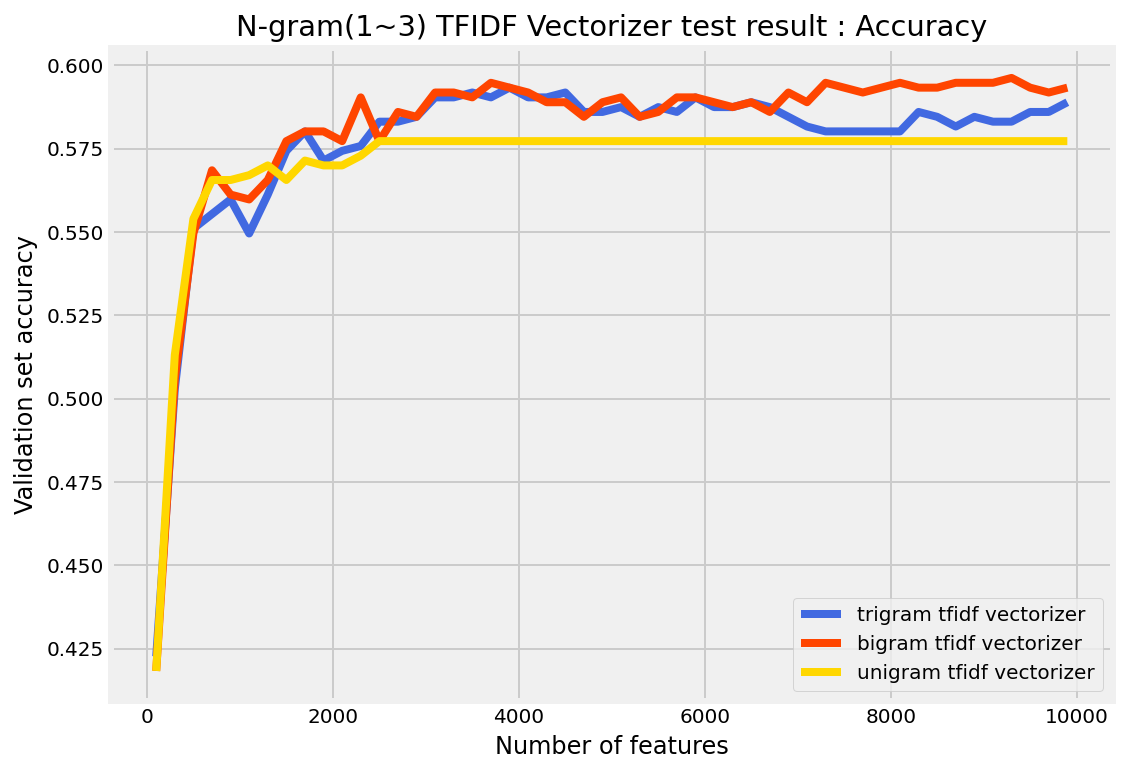

In [7]:
spelling_data.UseTFIDFVectorizer() #min_df = 3

In [129]:
train_spelling.to_excel(r"./output/train_df.xlsx",index=False)
valid_spelling.to_excel(r"./output/valid_df.xlsx",index=False)
test_spelling.to_excel(r"./output/test_df.xlsx",index=False)

In [6]:
train_segmented = word_segmentation.WordSegmentation(train_spelling)
valid_segmented = word_segmentation.WordSegmentation(valid_spelling)
test_segmented = word_segmentation.WordSegmentation(test_spelling)

In [7]:
segmented_data = logistic_regression.Logistic_Regression(train_segmented.Sentence, train_segmented.Emotion, valid_segmented.Sentence, valid_segmented.Emotion, test_segmented.Sentence, test_segmented.Emotion)

In [8]:
all_segmented_data = pd.concat([train_segmented, valid_segmented, test_segmented])
segmented_data_statistic = word_statistics.WordStatistics(all_segmented_data)
segmented_data_statistic.head()
all_segmented_data.to_excel('../output/statistics/all_segmented_data.xlsx')
segmented_data_statistic.to_excel('../output/statistics/all_segmented_data Word Statistics.xlsx')

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)
Validation result for 3800 features
accuracy score: 56.12%
accuracy_test score: 57.72%

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)
Validation result for 3800 features
accuracy score: 56.85%
accuracy_test score: 55.12%

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)
Validation result for 3800 features
accuracy score: 56.27%
accuracy_test score: 54.98%


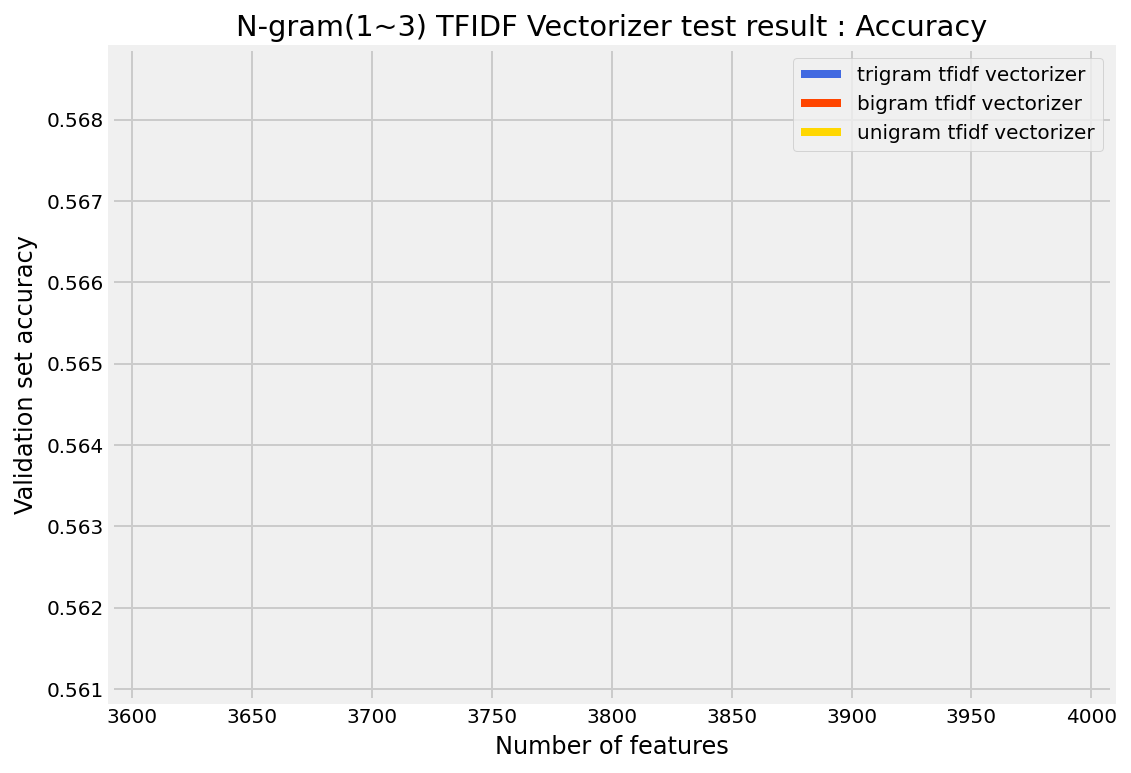

In [16]:
#for fun test
segmented_data.UseTFIDFVectorizer(n_features=3800)

In [17]:
segmented_data.TestSentence("phẫn nộ")

Other


In [20]:
print(test_segmented)

     Unnamed: 0  Unnamed: 0.1    Emotion  \
0             0           713    Sadness   
1             1          1827   Surprise   
2             2          1166    Disgust   
3             3           228       Fear   
4             4          1942      Anger   
..          ...           ...        ...   
688         688           432    Sadness   
689         689           178  Enjoyment   
690         690          1863   Surprise   
691         691           476      Other   
692         692          1607   Surprise   

                                              Sentence  
0                     người_ta có bạn_bè nhìn vui thật  
1            cho nghỉ viêc mói đúng sao goi là kỷ_luật  
2                        kinh vãi lồn : pouting_face :  
3    nhà thì không xa lắm nhưng chưa bao_giờ đi vì ...  
4        bố không thích nộp đấy mày thích ý_kiến không  
..                                                 ...  
688  lúc thì cuốc đất è_cổ ra không có giun mà câu ...  
689  các bác dẫ

RESULT FOR UNIGRAM WITH STOP WORDS (CountVectorizer)
Validation result for 100 features
accuracy score: 41.84%
accuracy_test score: 41.99%
0.40008086391552566
Validation result for 200 features
accuracy score: 45.34%
accuracy_test score: 45.17%
0.44159216761508147
Validation result for 300 features
accuracy score: 50.58%
accuracy_test score: 47.91%
0.46946418819704194
Validation result for 400 features
accuracy score: 51.31%
accuracy_test score: 50.07%
0.49380678441385123
Validation result for 500 features
accuracy score: 51.46%
accuracy_test score: 52.24%
0.5158872855916632
Validation result for 600 features
accuracy score: 50.58%
accuracy_test score: 51.52%
0.5112580552409236
Validation result for 700 features
accuracy score: 52.19%
accuracy_test score: 52.81%
0.5232545337971589
Validation result for 800 features
accuracy score: 51.31%
accuracy_test score: 53.54%
0.5304274178355617
Validation result for 900 features
accuracy score: 52.62%
accuracy_test score: 54.55%
0.541348970949247

accuracy score: 53.35%
accuracy_test score: 55.84%
0.5554193034749951
Validation result for 3000 features
accuracy score: 53.64%
accuracy_test score: 55.70%
0.5532077839170044
Validation result for 3100 features
accuracy score: 53.94%
accuracy_test score: 55.84%
0.5547450926726359
Validation result for 3200 features
accuracy score: 53.50%
accuracy_test score: 55.56%
0.5511874184196133
Validation result for 3300 features
accuracy score: 53.64%
accuracy_test score: 55.27%
0.547705836802509
Validation result for 3400 features
accuracy score: 53.64%
accuracy_test score: 54.98%
0.5455770877365556
Validation result for 3500 features
accuracy score: 53.35%
accuracy_test score: 55.27%
0.5491012947545659
Validation result for 3600 features
accuracy score: 53.50%
accuracy_test score: 55.27%
0.5496134574019372
Validation result for 3700 features
accuracy score: 53.64%
accuracy_test score: 55.12%
0.5484089834005585
Validation result for 3800 features
accuracy score: 53.50%
accuracy_test score: 54.

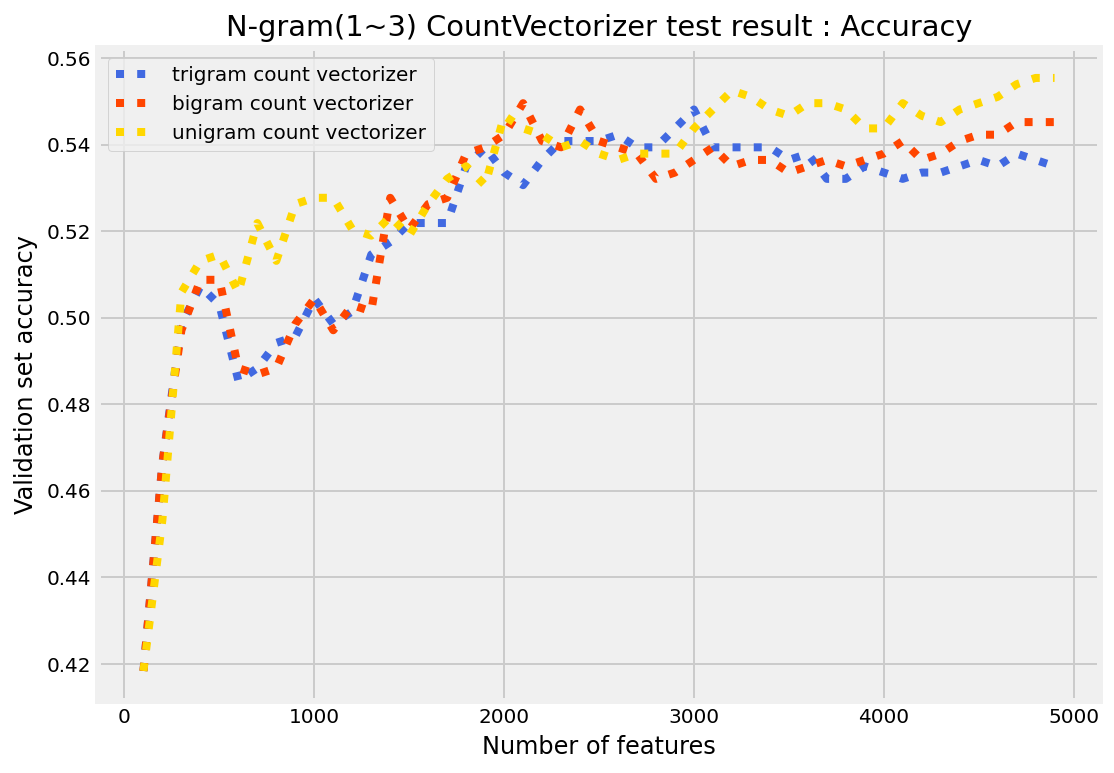

In [16]:
segmented_data.UseCountVectorizer()

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)
Validation result for 100 features
accuracy score: 41.40%
accuracy_test score: 42.28%
0.4108072681474616
Validation result for 200 features
accuracy score: 46.36%
accuracy_test score: 47.76%
0.4680500553934138
Validation result for 300 features
accuracy score: 51.17%
accuracy_test score: 51.52%
0.5043343274938578
Validation result for 400 features
accuracy score: 51.46%
accuracy_test score: 51.95%
0.5076717280791937
Validation result for 500 features
accuracy score: 51.90%
accuracy_test score: 54.55%
0.5338223945515032
Validation result for 600 features
accuracy score: 53.35%
accuracy_test score: 55.41%
0.5406386036959822
Validation result for 700 features
accuracy score: 55.10%
accuracy_test score: 56.85%
0.5562247438641791
Validation result for 800 features
accuracy score: 54.96%
accuracy_test score: 55.99%
0.5465850167338483
Validation result for 900 features
accuracy score: 54.66%
accuracy_test score: 56.57%
0.5525446860131833
Validation r

accuracy score: 56.71%
accuracy_test score: 54.69%
0.5326654631528585
Validation result for 3000 features
accuracy score: 56.71%
accuracy_test score: 54.98%
0.5350750657994529
Validation result for 3100 features
accuracy score: 56.56%
accuracy_test score: 54.83%
0.534136434662435
Validation result for 3200 features
accuracy score: 56.85%
accuracy_test score: 54.40%
0.5286919948498892
Validation result for 3300 features
accuracy score: 56.71%
accuracy_test score: 54.69%
0.5323236422919589
Validation result for 3400 features
accuracy score: 56.56%
accuracy_test score: 54.83%
0.5337683014260761
Validation result for 3500 features
accuracy score: 56.56%
accuracy_test score: 55.27%
0.5381904562935774
Validation result for 3600 features
accuracy score: 56.71%
accuracy_test score: 55.12%
0.5371204886382677
Validation result for 3700 features
accuracy score: 56.71%
accuracy_test score: 55.12%
0.5372933087558324
Validation result for 3800 features
accuracy score: 56.85%
accuracy_test score: 55.

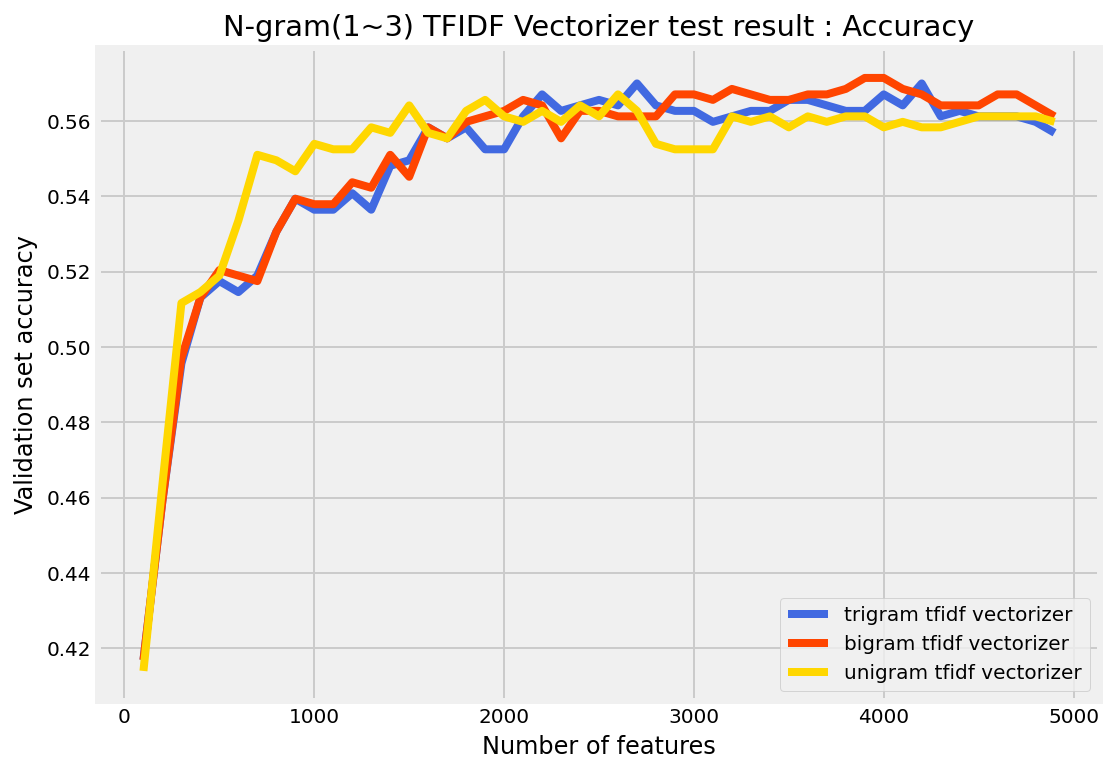

In [17]:
segmented_data.UseTFIDFVectorizer()

In [6]:
from sklearn import preprocessing
from sklearn.metrics import f1_score
from keras.models import Sequential, load_model
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from gensim.models import Word2Vec

Using TensorFlow backend.
unable to import 'smart_open.gcs', disabling that module


In [7]:
plt.style.use('ggplot')
def plot_history(history):
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [8]:
le = preprocessing.LabelEncoder()
def EncodeLabel(df):
    
    le.fit(df['Emotion'])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df.Emotion = le.transform(df['Emotion'])
    
    return df

In [9]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    
    embeddings_index = {}
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    w2v_model = Word2Vec.load(filepath)
    
    for w in w2v_model.wv.vocab.keys():
        embeddings_index[w] = w2v_model.wv[w]
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [132]:
train_cleaned_encoded = EncodeLabel(train_segmented)
test_cleaned_encoded = EncodeLabel(test_segmented)
valid_cleaned_encoded = EncodeLabel(valid_segmented)

In [172]:
x_train = train_cleaned_encoded.Sentence
y_train = train_cleaned_encoded.Emotion
x_valid = valid_cleaned_encoded.Sentence
y_valid = valid_cleaned_encoded.Emotion
x_test = test_cleaned_encoded.Sentence
y_test = test_cleaned_encoded.Emotion

In [134]:
length = []
for x in x_train:
    length.append(len(x.split()))
for x in x_valid:
    length.append(len(x.split()))
maxlen = max(length)
print(maxlen)

132


In [4]:
max([1,2,3])

3

In [173]:
tokenizer = Tokenizer(num_words=3500)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_valid = tokenizer.texts_to_sequences(x_valid)
x_valid = pad_sequences(x_valid, padding='post', maxlen=maxlen)
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
vocab_size = len(tokenizer.word_index) + 1

In [136]:
embedding_dim = 100
embedding_matrix=create_embedding_matrix('./vi.bin', tokenizer.word_index, embedding_dim)

In [137]:
input_dim = x_train.shape
print(input_dim)

(5548, 132)


In [138]:
print(vocab_size)

3822


In [ ]:
,trainable=True weights=[embedding_matrix],

In [174]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           trainable=True,
                           input_length=maxlen))
model.add(layers.Conv1D(128, 4, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(87, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
callbacks = [ReduceLROnPlateau(),
    EarlyStopping(patience=2),
    ModelCheckpoint(filepath='./model-simple.h5', save_best_only=True)]
model.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_50 (Embedding)     (None, 132, 100)          382200    
_________________________________________________________________
conv1d_64 (Conv1D)           (None, 129, 128)          51328     
_________________________________________________________________
global_max_pooling1d_50 (Glo (None, 128)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 40)                5160      
_________________________________________________________________
dense_97 (Dense)             (None, 87)                3567      
Total params: 442,255
Trainable params: 442,255
Non-trainable params: 0
_________________________________________________________________


c:\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5548 samples, validate on 686 samples
Epoch 1/10
 - 9s - loss: 1.7323 - accuracy: 0.3837 - val_loss: 1.3423 - val_accuracy: 0.5277
Epoch 2/10
 - 9s - loss: 1.1120 - accuracy: 0.6081 - val_loss: 1.2287 - val_accuracy: 0.5685
Epoch 3/10
 - 9s - loss: 0.7754 - accuracy: 0.7307 - val_loss: 1.2903 - val_accuracy: 0.5656
Epoch 4/10
 - 9s - loss: 0.4763 - accuracy: 0.8432 - val_loss: 1.4256 - val_accuracy: 0.5758


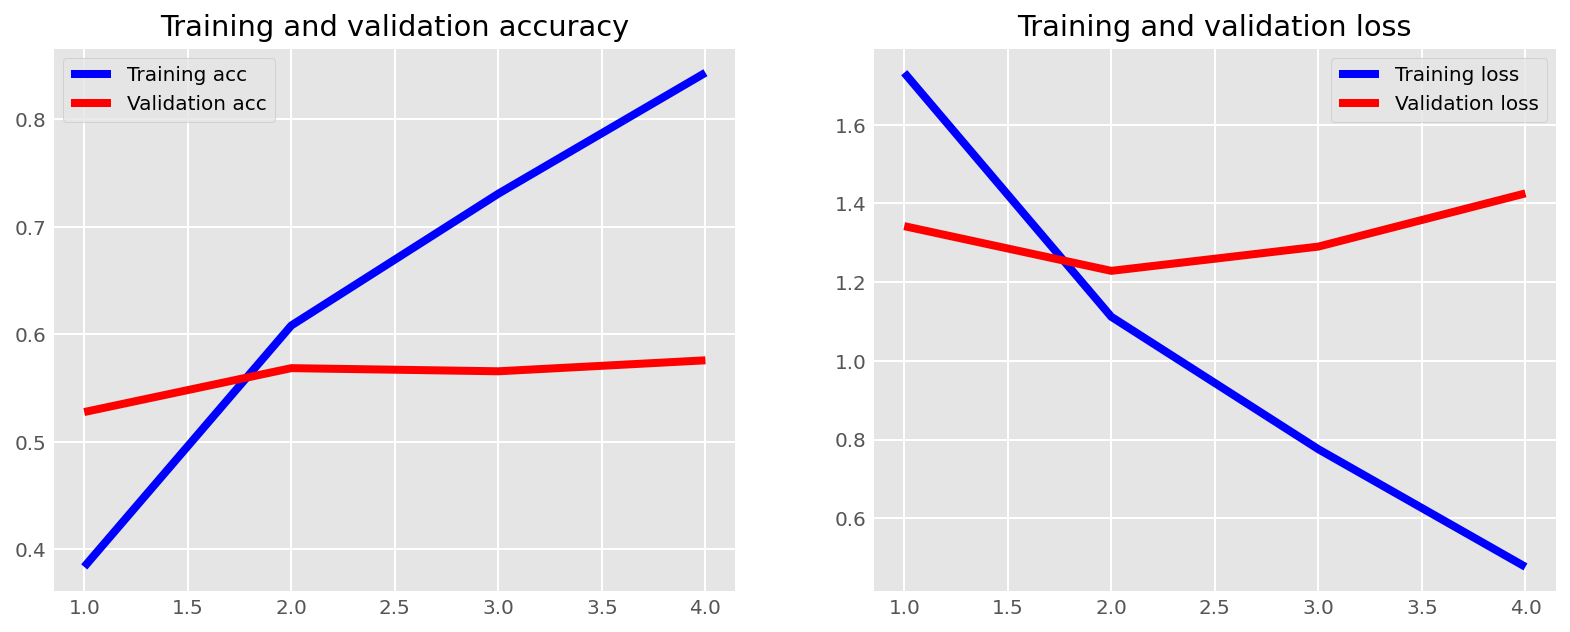

In [175]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    verbose=2,
                    validation_data=(x_valid, y_valid),
                    batch_size=10,
                   callbacks=callbacks)
plot_history(history)

In [196]:
cnn_model = load_model('./model-simple.h5')
train_loss, train_accuracy = cnn_model.evaluate(x_train, y_train, verbose=False)
val_loss, val_accuracy = cnn_model.evaluate(x_valid, y_valid, verbose=False)
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=False)
weighted_f1_score = f1_score(y_test, cnn_model.predict_classes(x_test), average="weighted")
print("Training Accuracy: {:.2f}%".format(train_accuracy*100))
print("Valid {}: {}".format(model.metrics_names[0], val_loss))
print("Valid {}: {:.2f}".format(model.metrics_names[1], val_accuracy*100))
print("Test {}: {}".format(model.metrics_names[0], test_loss))
print("Test {}: {:.2f}".format(model.metrics_names[1], test_accuracy*100))
print("f1-score: {:.2f}%".format(weighted_f1_score*100))

c:\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Training Accuracy: 75.88%
Valid loss: 1.228677121612838
Valid accuracy: 56.85
Test loss: 1.2711265486212175
Test accuracy: 54.11
f1-score: 53.09%


In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(max_iter= 200),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

In [111]:
x_train = train_df.Sentence[:800]
y_train = train_df.Emotion[:800]
x_valid = valid_df.Sentence[:200]
y_valid = valid_df.Emotion[:200]
x_test = test_df.Sentence[:100]
y_test = test_df.Emotion[:100]

In [112]:
from sklearn.metrics import accuracy_score, f1_score
def accuracy_summary(pipeline, x_train, y_train, x_valid, y_valid):

    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_valid)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_valid, y_pred)
    weighted_f1_score = f1_score(y_valid, y_pred, average="weighted")
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    print("f1-score: {0:.2f}%".format(weighted_f1_score*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

In [113]:
tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=3500, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_valid, y_valid)
        result.append((n,clf_accuracy,tt_time))
    return result

In [114]:
trigram_result = classifier_comparator(n_features=3000,ngram_range=(1,1))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy score: 45.50%
f1-score: 39.38%
train and test time: 0.27s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
accuracy score: 40.50%
f1-score: 38.84%
train and test time: 0.07s
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-based feature selection
Pipeline(

In [1]:
%run main.py

Using TensorFlow backend.
unable to import 'smart_open.gcs', disabling that module


Which algorithm do you want to use?
[1]: Logistic Regression
[2]: Convolutional Neural Network
[3]: Test on built model
[1/2/3] 3


c:\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Do you want to test on sentence [1] or excel file contains sentence [2] ? [1/2] 2


c:\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
